In [1]:
import pandas as pd 
import datetime as dt 
import os 
import openmeteo_requests
import requests_cache

In [3]:
file_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\\data", 'Total_Data_10Y_Top23.csv')
us_avaiation_data = pd.read_csv(file_path)
us_avaiation_data['FL_DATE'] = pd.to_datetime(us_avaiation_data['FL_DATE'])
us_avaiation_data['TOTAL_DELAY'] = us_avaiation_data['WEATHER_DELAY'] + us_avaiation_data['LATE_AIRCRAFT_DELAY'] + us_avaiation_data['CARRIER_DELAY'] + us_avaiation_data['NAS_DELAY']

In [6]:
us_avaiation_data.head(-5)

FL_DATE OP_UNIQUE_CARRIER TAIL_NUM  ORIGIN_AIRPORT_SEQ_ID  \
0        2014-07-01                AA   N002AA                1105703   
1        2014-07-01                AA   N002AA                1129803   
2        2014-07-01                AA   N004AA                1039705   
3        2014-07-01                AA   N004AA                1129803   
4        2014-07-01                AA   N004AA                1129803   
...             ...               ...      ...                    ...   
12926546 2018-12-31                YX   N748YX                1161802   
12926547 2018-12-31                YX   N858RW                1161802   
12926548 2018-12-31                YX   N858RW                1449202   
12926549 2018-12-31                YX   N863RW                1129806   
12926550 2018-12-31                YX   N863RW                1393007   

          ORIGIN_CITY_MARKET_ID ORIGIN       ORIGIN_CITY_NAME  \
0                         31057    CLT          Charlotte, NC   
1                         30194    DFW  Dallas/Fort Worth, TX   
2                         30397    ATL            Atlanta, GA   
3                         30194    DFW  Dallas/Fort Worth, TX   
4                         30194    DFW  Dallas/Fort Worth, TX   
...                         ...    ...                    ...   
12926546                  31703    EWR             Newark, NJ   
12926547                  31703    EWR             Newark, NJ   
12926548                  34492    RDU     Raleigh/Durham, NC   
12926549                  30194    DFW  Dallas/Fort Worth, TX   
12926550                  30977    ORD            Chicago, IL   

          DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST  ... ARR_TIME  \
0                     1129803                30194  DFW  ...   1214.0   
1                     1105703                31057  CLT  ...    945.0   
2                     1129803                30194  DFW  ...   1341.0   
3                     1039705                30397  ATL  ...   1159.0   
4                     1039705                30397  ATL  ...   2317.0   
...                       ...                  ...  ...  ...      ...   
12926546              1129806                30194  DFW  ...   1934.0   
12926547              1449202                34492  RDU  ...   1243.0   
12926548              1393007                30977  ORD  ...   1450.0   
12926549              1161802                31703  EWR  ...   1758.0   
12926550              1129806                30194  DFW  ...   1325.0   

          ARR_DELAY  CANCELLED  CANCELLATION_CODE  CARRIER_DELAY  \
0               9.0        0.0                NaN            NaN   
1               0.0        0.0                NaN            NaN   
2              -9.0        0.0                NaN            NaN   
3               4.0        0.0                NaN            NaN   
4               2.0        0.0                NaN            NaN   
...             ...        ...                ...            ...   
12926546        1.0        0.0                NaN            NaN   
12926547      -10.0        0.0                NaN            NaN   
12926548       -5.0        0.0                NaN            NaN   
12926549      -13.0        0.0                NaN            NaN   
12926550       25.0        0.0                NaN            0.0   

          WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY LATE_AIRCRAFT_DELAY  \
0                   NaN        NaN             NaN                 NaN   
1                   NaN        NaN             NaN                 NaN   
2                   NaN        NaN             NaN                 NaN   
3                   NaN        NaN             NaN                 NaN   
4                   NaN        NaN             NaN                 NaN   
...                 ...        ...             ...                 ...   
12926546            NaN        NaN             NaN                 NaN   
12926547            NaN        NaN             NaN                 N

# DELAYS

In [147]:
weather_delay = us_avaiation_data[us_avaiation_data['CANCELLATION_CODE'].isna()]
# Extracting Month and Year to Join with Monthly Weather Conditions
weather_delay['FL_MONTH'] = weather_delay['FL_DATE'].dt.month
weather_delay['FL_YEAR'] = weather_delay['FL_DATE'].dt.year
# if delay is NaN we want to show this as 0
weather_delay['TOTAL_DELAY'] = weather_delay['TOTAL_DELAY'].fillna(0.0)


C:\Users\youss\AppData\Local\Temp\ipykernel_24372\234183179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_delay['FL_MONTH'] = weather_delay['FL_DATE'].dt.month
C:\Users\youss\AppData\Local\Temp\ipykernel_24372\234183179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_delay['FL_YEAR'] = weather_delay['FL_DATE'].dt.year
C:\Users\youss\AppData\Local\Temp\ipykernel_24372\234183179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [148]:
# rearragning columns to have Y value at the end 
weather_delay = weather_delay[['FL_YEAR', 'FL_MONTH', 'FL_DATE',  'ORIGIN', 'DEST', 'DEST_CITY_NAME',
       'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TOTAL_DELAY']]

#if not arr time or dep time meaning the flight never happened 
weather_delay = weather_delay.dropna(subset=['ARR_TIME'])
weather_delay = weather_delay.dropna(subset=['DEP_TIME'])

#checking sums of na arr and dep times 
weather_delay['ARR_TIME'].isna().sum()
weather_delay['DEP_TIME'].isna().sum()



np.int64(0)

In [152]:
def rounding_time(x):
    """
    Rounding Dep and Arr Time to the nearest Hour +/-

    Arguments: 
    x -- time string variable 

    Returns: 
    int: rounded arr/ dep time to the nearest hour +/-
    
    """

    time_str = f"{int(x):04d}"  

    if len(time_str) != 4:
        return None

    hour = int(time_str[:2])   
    minute = int(time_str[2:])   
    if 0 <= hour < 24 and 0 <= minute < 60:
        if minute >= 30:
            hour += 1
            if hour == 24:  
                hour = 0
            minute = 0
        else:
            minute = 0

        return f"{hour:02d}{minute:02d}"  
    else:
        return None  

weather_delay['ARR_TIME_STR_ROUNDED'] = weather_delay['ARR_TIME'].apply(rounding_time)
weather_delay['DEP_TIME_STR_ROUNDED'] = weather_delay['DEP_TIME'].apply(rounding_time)

# drop invalid formats 
weather_delay = weather_delay.dropna(subset=['ARR_TIME_STR_ROUNDED'])
weather_delay = weather_delay.dropna(subset=['DEP_TIME_STR_ROUNDED'])

weather_delay['ARR_TIME_DT'] = pd.to_datetime(weather_delay['ARR_TIME_STR_ROUNDED'], format='%H%M', errors='coerce').dt.time
weather_delay['DEP_TIME_DT'] = pd.to_datetime(weather_delay['DEP_TIME_STR_ROUNDED'], format='%H%M', errors='coerce').dt.time




In [154]:
# formatting time to deseriable format 
weather_delay['ARR_TIME_DT'] = pd.to_datetime(weather_delay['ARR_TIME_DT'], format='%H:%M:%S').dt.time
weather_delay['DEP_TIME_DT'] = pd.to_datetime(weather_delay['DEP_TIME_DT'], format='%H:%M:%S').dt.time

weather_delay['ARR_HOUR'] = pd.to_datetime(weather_delay['ARR_TIME_DT'], format='%H:%M:%S').dt.hour
weather_delay['ARR_HOUR'] = weather_delay['ARR_HOUR'].apply((lambda x: f'{x:02d}:00:00'))
weather_delay['DEP_HOUR'] = pd.to_datetime(weather_delay['DEP_TIME_DT'], format='%H:%M:%S').dt.hour
weather_delay['DEP_HOUR'] = weather_delay['DEP_HOUR'].apply((lambda x: f'{x:02d}:00:00'))

In [156]:
# Grouping Flights by Date , Hour and Dest/Origin 
arr_delay_sum = weather_delay.groupby(by = ['FL_DATE','ARR_HOUR','DEST'])['TOTAL_DELAY'].sum().reset_index()
dep_delay_sum = weather_delay.groupby(by =['FL_DATE','DEP_HOUR','ORIGIN'])['TOTAL_DELAY'].sum().reset_index()
# renaming columns to prepare to merge with weather dataset 
arr_delay_sum = arr_delay_sum.rename(columns={'TOTAL_DELAY': "total_delay_arr"})
dep_delay_sum = dep_delay_sum.rename(columns={'TOTAL_DELAY': "total_delay_dep"})

weather_delay = pd.merge(arr_delay_sum, dep_delay_sum, left_on=['FL_DATE','ARR_HOUR', 'DEST'] , right_on=['FL_DATE','DEP_HOUR','ORIGIN'], how='inner')
weather_delay['TOTAL_DELAY'] = weather_delay['total_delay_arr'].fillna(0) + weather_delay['total_delay_dep'].fillna(0)

# Dont need origin anymore as the same airport has all departing and arriving flights 
weather_delay.drop(columns=['ORIGIN'], inplace=True)
weather_delay.rename(columns={'DEST': 'Airport'}, inplace=True)




In [159]:
# Checking results
weather_delay

FL_DATE  ARR_HOUR Airport  total_delay_arr  DEP_HOUR  \
0       2014-07-01  00:00:00     DEN             28.0  00:00:00   
1       2014-07-01  00:00:00     HOU             55.0  00:00:00   
2       2014-07-01  00:00:00     JFK            682.0  00:00:00   
3       2014-07-01  00:00:00     LAS            141.0  00:00:00   
4       2014-07-01  00:00:00     LAX             87.0  00:00:00   
...            ...       ...     ...              ...       ...   
1527927 2024-06-30  23:00:00     SFO            340.0  23:00:00   
1527928 2024-06-30  23:00:00     SJC             75.0  23:00:00   
1527929 2024-06-30  23:00:00     SJU             73.0  23:00:00   
1527930 2024-06-30  23:00:00     SMF            124.0  23:00:00   
1527931 2024-06-30  23:00:00     STL            154.0  23:00:00   

         total_delay_dep  TOTAL_DELAY  
0                    0.0         28.0  
1                   95.0        150.0  
2                    0.0        682.0  
3                   98.0        239.0  
4                  104.0        191.0  
...                  ...          ...  
1527927            132.0        472.0  
1527928              0.0         75.0  
1527929              0.0         73.0  
1527930              0.0        124.0  
1527931              0.0        154.0  

[1527932 rows x 7 columns]

In [6]:
# Reading dataset that obtains airport Lat and Long to use in weather api
airport_lat_long_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\supplementary", "dataset_airport_geo_codes.csv")
airport_geo_codes = pd.read_csv(airport_lat_long_path)

In [7]:
# Getting the Geocodes of the airports we are analyzing 
unique_airports = us_avaiation_data['ORIGIN'].unique()
unique_airports_mask = airport_geo_codes['AIRPORT'].isin(unique_airports)
needed_airport_codes = airport_geo_codes[unique_airports_mask]
needed_airport_codes['DISPLAY_AIRPORT_NAME'] = needed_airport_codes['DISPLAY_AIRPORT_NAME'].str.strip()
needed_airport_codes['DISPLAY_AIRPORT_CITY_NAME_FULL'] = needed_airport_codes['DISPLAY_AIRPORT_CITY_NAME_FULL'].str.strip()
needed_airport_codes['DISPLAY_CITY_MARKET_NAME_FULL'] = needed_airport_codes['DISPLAY_CITY_MARKET_NAME_FULL'].str.strip()

needed_airport_codes['LATITUDE'] = needed_airport_codes['LATITUDE'].round(2)
needed_airport_codes['LONGITUDE'] = needed_airport_codes['LONGITUDE'].round(2)

needed_airport_codes_cleaned = needed_airport_codes.drop_duplicates(subset=['DISPLAY_AIRPORT_NAME', 'DISPLAY_AIRPORT_CITY_NAME_FULL',
       'DISPLAY_CITY_MARKET_NAME_FULL', 'LATITUDE', 'LONGITUDE'])

In [8]:
# intially saved the file after transformation, indicated by commented code
save_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\supplementary", 'dataset_airport_geo_codes.csv')
# needed_airport_codes_cleaned.to_csv(save_path)
dataset_airport_geo_codes = pd.read_csv(save_path)
geo_code_tuple_list = [(x,y) for x , y in zip(dataset_airport_geo_codes['LATITUDE'], dataset_airport_geo_codes['LONGITUDE'])]
dataset_airport_codes = [ x for x in dataset_airport_geo_codes['AIRPORT']]

In [16]:
# this skeletion code is given to us by https://open-meteo.com/ thank god!

import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": [33.64, 35.21, 32.85, 39.86, 32.9, 40.69, 29.64, 40.64, 36.08, 33.94, 28.43, 25.79, 29.99, 41.97, 45.59, 33.43, 35.88, 47.45, 37.62, 37.36, 18.44, 38.7, 33.68, 38.75],
	"longitude": [-84.43, -80.95, -96.85, -104.67, -97.04, -74.17, -95.28, -73.78, -115.15, -118.41, -81.31, -80.29, -90.25, -87.91, -122.6, -112.01, -78.78, -122.31, -122.38, -121.94, -66, -121.59, -117.87, -90.37],
	"hourly": ["rain", "snowfall", "weather_code", "visibility", "wind_speed_10m", "wind_speed_120m", "wind_direction_10m", "wind_direction_120m", "wind_gusts_10m"],
	"start_date": "2014-07-01",
	"end_date": "2024-06-30",
}
responses = openmeteo.weather_api(url, params=params)
dataset_airport_codes = [ x for x in dataset_airport_geo_codes['AIRPORT']]
airport_weather_dataframe_list = []
for row , airport_code in zip(range(len(responses)), dataset_airport_codes): 
# Process first location. Add a for-loop for multiple locations or weather models
	response = responses[row]
	print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
	print(f"Elevation {response.Elevation()} m asl")
	print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
	print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

	# Process daily data. The order of variables needs to be the same as requested.
	hourly = response.Hourly()
	hourly_rain = hourly.Variables(0).ValuesAsNumpy()
	hourly_snowfall = hourly.Variables(1).ValuesAsNumpy()
	hourly_weather_code = hourly.Variables(2).ValuesAsNumpy()
	hourly_visibility = hourly.Variables(3).ValuesAsNumpy()
	hourly_wind_speed_10m = hourly.Variables(4).ValuesAsNumpy()
	hourly_wind_speed_120m = hourly.Variables(5).ValuesAsNumpy()
	hourly_wind_direction_10m = hourly.Variables(6).ValuesAsNumpy()
	hourly_wind_direction_120m = hourly.Variables(7).ValuesAsNumpy()
	hourly_wind_gusts_10m = hourly.Variables(8).ValuesAsNumpy()

	hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
	)}
	hourly_data['airport_code'] = airport_code
	hourly_data["rain"] = hourly_rain
	hourly_data["snowfall"] = hourly_snowfall
	hourly_data["weather_code"] = hourly_weather_code
	hourly_data["visibility"] = hourly_visibility
	hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
	hourly_data["wind_speed_120m"] = hourly_wind_speed_120m
	hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
	hourly_data["wind_direction_120m"] = hourly_wind_direction_120m
	hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

	hourly_dataframe = pd.DataFrame(data = hourly_data)
	airport_weather_dataframe_list.append(hourly_dataframe)

Coordinates 33.63795852661133°N -84.4168701171875°E
Elevation 305.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 35.184532165527344°N -80.93112182617188°E
Elevation 213.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.86467361450195°N -96.82986450195312°E
Elevation 146.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 39.89455032348633°N -104.68618774414062°E
Elevation 1633.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.93497085571289°N -97.05880737304688°E
Elevation 178.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -74.19265747070312°E
Elevation 2.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 29.630929946899414°N -95.31866455078125°E
Elevation 12.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -73.81021118164062°E
Elevation 3.0 m asl
Timezone None None
Timezone difference t

In [17]:
#concating dataframes
airport_hist_weather_data = pd.concat(airport_weather_dataframe_list, axis = 0)

In [18]:
airport_hist_weather_data

date airport_code  rain  snowfall  weather_code  \
0     2014-07-01 00:00:00+00:00          ATL   0.0       0.0           1.0   
1     2014-07-01 01:00:00+00:00          ATL   0.0       0.0           1.0   
2     2014-07-01 02:00:00+00:00          ATL   0.0       0.0           1.0   
3     2014-07-01 03:00:00+00:00          ATL   0.0       0.0           1.0   
4     2014-07-01 04:00:00+00:00          ATL   0.0       0.0           1.0   
...                         ...          ...   ...       ...           ...   
87667 2024-06-30 19:00:00+00:00          STL   0.0       0.0           0.0   
87668 2024-06-30 20:00:00+00:00          STL   0.0       0.0           0.0   
87669 2024-06-30 21:00:00+00:00          STL   0.0       0.0           0.0   
87670 2024-06-30 22:00:00+00:00          STL   0.0       0.0           0.0   
87671 2024-06-30 23:00:00+00:00          STL   0.0       0.0           1.0   

       visibility  wind_speed_10m  wind_speed_120m  wind_direction_10m  \
0             NaN        3.758510              NaN          196.699326   
1             NaN        4.334974              NaN          175.236450   
2             NaN        4.829907              NaN          206.564987   
3             NaN        5.241679              NaN          195.945465   
4             NaN        6.120000              NaN          180.000000   
...           ...             ...              ...                 ...   
87667         NaN       13.004921              NaN            4.763556   
87668         NaN       14.058450              NaN            2.935620   
87669         NaN       14.869351              NaN            6.952864   
87670         NaN       15.745627              NaN           10.539137   
87671         NaN       15.281989              NaN           15.018415   

       wind_direction_120m  wind_gusts_10m  
0                      NaN       11.879999  
1                      NaN        6.120000  
2                      NaN        7.559999  
3                      NaN        8.640000  
4                      NaN       10.080000  
...                    ...             ...  
87667                  NaN       29.519999  
87668                  NaN       30.960001  
87669                  NaN       31.680000  
87670                  NaN       33.119999  
87671                  NaN       32.399998  

[2104128 rows x 11 columns]

In [19]:
# adding the WMO weather descriptions
wmo_weather_code_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\supplementary",'wmo_weather_codes.csv')
weather_codes = pd.read_csv(wmo_weather_code_path)
weather_codes['Code'] = weather_codes['Code'].astype(float)
weather_codes = weather_codes.rename(columns={'Description':'Weather Code Description', 'Code':'weather_code'})
airport_hist_weather_data = pd.merge(airport_hist_weather_data, weather_codes, how="left", on='weather_code')
airport_hist_weather_data = airport_hist_weather_data[['date', 'airport_code', 'rain', 'snowfall', 'weather_code', 'Weather Code Description',
       'visibility', 'wind_speed_10m', 'wind_speed_120m', 'wind_direction_10m',
       'wind_direction_120m', 'wind_gusts_10m']]


In [168]:
airport_hist_weather_data

date airport_code  rain  snowfall  weather_code  \
0       2014-07-01 00:00:00+00:00          ATL   0.0       0.0           1.0   
1       2014-07-01 01:00:00+00:00          ATL   0.0       0.0           1.0   
2       2014-07-01 02:00:00+00:00          ATL   0.0       0.0           1.0   
3       2014-07-01 03:00:00+00:00          ATL   0.0       0.0           1.0   
4       2014-07-01 04:00:00+00:00          ATL   0.0       0.0           1.0   
...                           ...          ...   ...       ...           ...   
2104123 2024-06-30 19:00:00+00:00          STL   0.0       0.0           0.0   
2104124 2024-06-30 20:00:00+00:00          STL   0.0       0.0           0.0   
2104125 2024-06-30 21:00:00+00:00          STL   0.0       0.0           0.0   
2104126 2024-06-30 22:00:00+00:00          STL   0.0       0.0           0.0   
2104127 2024-06-30 23:00:00+00:00          STL   0.0       0.0           1.0   

                                 Weather Code Description  visibility  \
0        Cloud development not observed or not observable         NaN   
1        Cloud development not observed or not observable         NaN   
2        Cloud development not observed or not observable         NaN   
3        Cloud development not observed or not observable         NaN   
4        Cloud development not observed or not observable         NaN   
...                                                   ...         ...   
2104123                   No significant weather observed         NaN   
2104124                   No significant weather observed         NaN   
2104125                   No significant weather observed         NaN   
2104126                   No significant weather observed         NaN   
2104127  Cloud development not observed or not observable         NaN   

         wind_speed_10m  wind_speed_120m  wind_direction_10m  \
0              3.758510              NaN          196.699326   
1              4.334974              NaN          175.236450   
2              4.829907              NaN          206.564987   
3              5.241679              NaN          195.945465   
4              6.120000              NaN          180.000000   
...                 ...              ...                 ...   
2104123       13.004921              NaN            4.763556   
2104124       14.058450              NaN            2.935620   
2104125       14.869351              NaN            6.952864   
2104126       15.745627              NaN           10.539137   
2104127       15.281989              NaN           15.018415   

         wind_direction_120m  wind_gusts_10m  
0                        NaN       11.879999  
1                        NaN        6.120000  
2                        NaN        7.559999  
3                        NaN        8.640000  
4                        NaN       10.080000  
...                      ...             ...  
2104123                  NaN       29.519999  
2104124                  NaN       30.960001  
2104125                  NaN       31.680000  
2104126                  NaN       33.119999  
2104127                  NaN       32.399998  

[2104128 rows x 12 columns]

In [169]:
# chaning date format in from the weather api data
airport_hist_weather_data['Hour'] = airport_hist_weather_data['date'].dt.hour
airport_hist_weather_data['date'] = airport_hist_weather_data['date'].dt.date
airport_hist_weather_data['Hour'] = airport_hist_weather_data['Hour'].apply((lambda x: f'{x:02d}:00:00'))
airport_hist_weather_data = airport_hist_weather_data[['date','Hour','airport_code', 'rain', 'snowfall', 'weather_code', 'Weather Code Description',
        'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m']]
airport_hist_weather_data['date'] = pd.to_datetime(airport_hist_weather_data['date'])

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2402388856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_hist_weather_data['date'] = pd.to_datetime(airport_hist_weather_data['date'])


In [179]:
# making sure column names are the same for the merge
weather_delay_renamed = weather_delay.rename(columns={'FL_DATE':'date','ARR_HOUR':'Hour','Airport':'airport_code'})
weather_delay_renamed.drop(columns=['DEP_HOUR'], inplace=True)

airport_hist_weather_delay = pd.merge(left=airport_hist_weather_data, right=weather_delay_renamed , how='left', on= ['date', 'Hour', 'airport_code'])

In [296]:
airport_hist_weather_delay

date      Hour airport_code  rain  snowfall  weather_code  \
0       2014-07-01  00:00:00          ATL   0.0       0.0           1.0   
1       2014-07-01  01:00:00          ATL   0.0       0.0           1.0   
2       2014-07-01  02:00:00          ATL   0.0       0.0           1.0   
3       2014-07-01  03:00:00          ATL   0.0       0.0           1.0   
4       2014-07-01  04:00:00          ATL   0.0       0.0           1.0   
...            ...       ...          ...   ...       ...           ...   
2104123 2024-06-30  19:00:00          STL   0.0       0.0           0.0   
2104124 2024-06-30  20:00:00          STL   0.0       0.0           0.0   
2104125 2024-06-30  21:00:00          STL   0.0       0.0           0.0   
2104126 2024-06-30  22:00:00          STL   0.0       0.0           0.0   
2104127 2024-06-30  23:00:00          STL   0.0       0.0           1.0   

                                 Weather Code Description  wind_speed_10m  \
0        Cloud development not observed or not observable        3.758510   
1        Cloud development not observed or not observable        4.334974   
2        Cloud development not observed or not observable        4.829907   
3        Cloud development not observed or not observable        5.241679   
4        Cloud development not observed or not observable        6.120000   
...                                                   ...             ...   
2104123                   No significant weather observed       13.004921   
2104124                   No significant weather observed       14.058450   
2104125                   No significant weather observed       14.869351   
2104126                   No significant weather observed       15.745627   
2104127  Cloud development not observed or not observable       15.281989   

         wind_direction_10m  wind_gusts_10m  total_delay_arr  total_delay_dep  \
0                196.699326       11.879999              NaN              NaN   
1                175.236450        6.120000              NaN              NaN   
2                206.564987        7.559999              NaN              NaN   
3                195.945465        8.640000              NaN              NaN   
4                180.000000       10.080000              NaN              NaN   
...                     ...             ...              ...              ...   
2104123            4.763556       29.519999            214.0            302.0   
2104124            2.935620       30.960001             52.0            169.0   
2104125            6.952864       31.680000              0.0             65.0   
2104126           10.539137       33.119999              NaN              NaN   
2104127           15.018415       32.399998            154.0              0.0   

         TOTAL_DELAY  Month  Year  
0                NaN      7  2014  
1                NaN      7  2014  
2                NaN      7  2014  
3                NaN      7  2014  
4                NaN      7  2014  
...              ...    ...   ...  
2104123        516.0      6  2024  
2104124        221.0      6  2024  
2104125         65.0      6  2024  
2104126          NaN      6  2024  
2104127        154.0      6  2024  

[2104128 rows x 15 columns]

In [181]:
weather_delay_by_airport_cat = airport_hist_weather_delay.groupby(by=['Weather Code Description', 'airport_code'])['TOTAL_DELAY'].describe()
weather_delay_by_airport_cat

count  \
Weather Code Description                         airport_code            
Cloud development not observed or not observable ATL           16320.0   
                                                 CLT           15644.0   
                                                 DAL           11360.0   
                                                 DEN           16043.0   
                                                 DFW           14234.0   
...                                                                ...   
State of the sky generally unchanged             SJC            4231.0   
                                                 SJU            4250.0   
                                                 SMF            3256.0   
                                                 SNA            4592.0   
                                                 STL            4801.0   

                                                                     mean  \
Weather Code Description                         airport_code               
Cloud development not observed or not observable ATL           268.157782   
                                                 CLT           177.315329   
                                                 DAL            95.837412   
                                                 DEN           307.404351   
                                                 DFW           288.506253   
...                                                                   ...   
State of the sky generally unchanged             SJC            71.722288   
                                                 SJU            76.628941   
                                                 SMF            85.958538   
                                                 SNA            96.941855   
                                                 STL            92.754218   

                                                                      std  \
Weather Code Description                         airport_code               
Cloud development not observed or not observable ATL           392.900138   
                                                 CLT           268.029009   
                                                 DAL           171.208240   
                                                 DEN           407.220041   
                                                 DFW           405.197407   
...                                                                   ...   
State of the sky generally unchanged             SJC           114.904475   
                                                 SJU           138.030321   
                                                 SMF           133.558363   
                                                 SNA           130.200139   
                                                 STL           146.962134   

                                                               min   25%  \
Weather Code Description                         airport_code              
Cloud development not observed or not observable ATL           0.0  42.0   
                                                 CLT           0.0  21.0   
                                                 DAL           0.0   0.0   
                                                 DEN           0.0  60.0   
                                                 DFW           0.0  43.0   
...                                                            ...   ...   
State of the sky generally unchanged             SJC           0.0   0.0   
                                                 SJU           0.0   0.0   
                                                 SMF           0.0   0.0   
                                                 SNA           0.0   0.0   
                                                 STL           0.0   0.0   

                                                                 50%     75%  \
Weather Code Description     

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

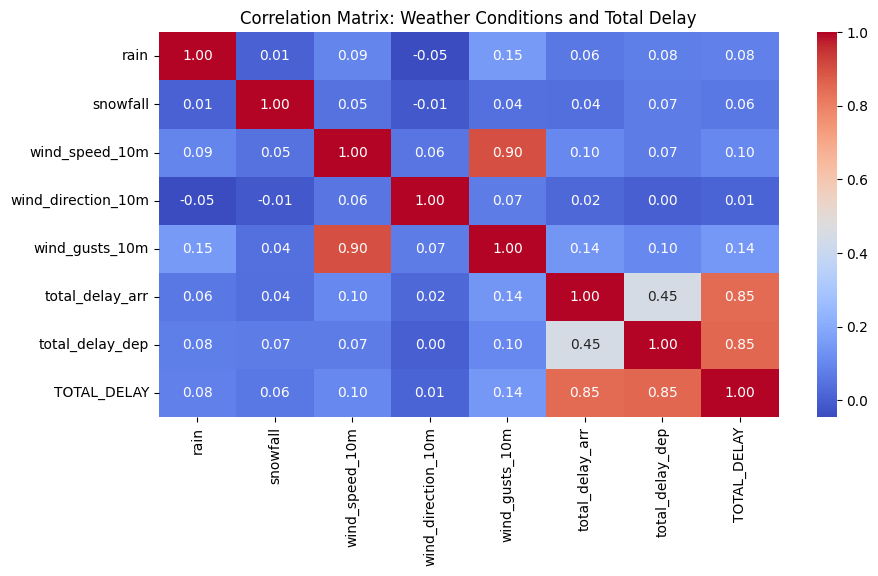

In [302]:
# Correlation

cols_for_corr = ['rain', 'snowfall', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m','total_delay_arr', 'total_delay_dep','TOTAL_DELAY']
airport_weather_corr = airport_hist_weather_delay[cols_for_corr].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(airport_weather_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Weather Conditions and Total Delay')
plt.show()

In [299]:
airport_weather_corr

rain  snowfall  wind_speed_10m  wind_direction_10m  \
rain                1.000000  0.005507        0.093496           -0.046700   
snowfall            0.005507  1.000000        0.045724           -0.014191   
wind_speed_10m      0.093496  0.045724        1.000000            0.055178   
wind_direction_10m -0.046700 -0.014191        0.055178            1.000000   
wind_gusts_10m      0.150269  0.042395        0.901299            0.068393   
total_delay_arr     0.061258  0.036119        0.102762            0.019749   
total_delay_dep     0.076129  0.069299        0.070656            0.001248   
TOTAL_DELAY         0.080802  0.062097        0.101767            0.012256   

                    wind_gusts_10m  total_delay_arr  total_delay_dep  \
rain                      0.150269         0.061258         0.076129   
snowfall                  0.042395         0.036119         0.069299   
wind_speed_10m            0.901299         0.102762         0.070656   
wind_direction_10m        0.068393         0.019749         0.001248   
wind_gusts_10m            1.000000         0.140419         0.104217   
total_delay_arr           0.140419         1.000000         0.447831   
total_delay_dep           0.104217         0.447831         1.000000   
TOTAL_DELAY               0.143600         0.848365         0.853281   

                    TOTAL_DELAY  
rain                   0.080802  
snowfall               0.062097  
wind_speed_10m         0.101767  
wind_direction_10m     0.012256  
wind_gusts_10m         0.143600  
total_delay_arr        0.848365  
total_delay_dep        0.853281  
TOTAL_DELAY            1.000000

## Investigating Relationship Between Weather Conditions and Delay 

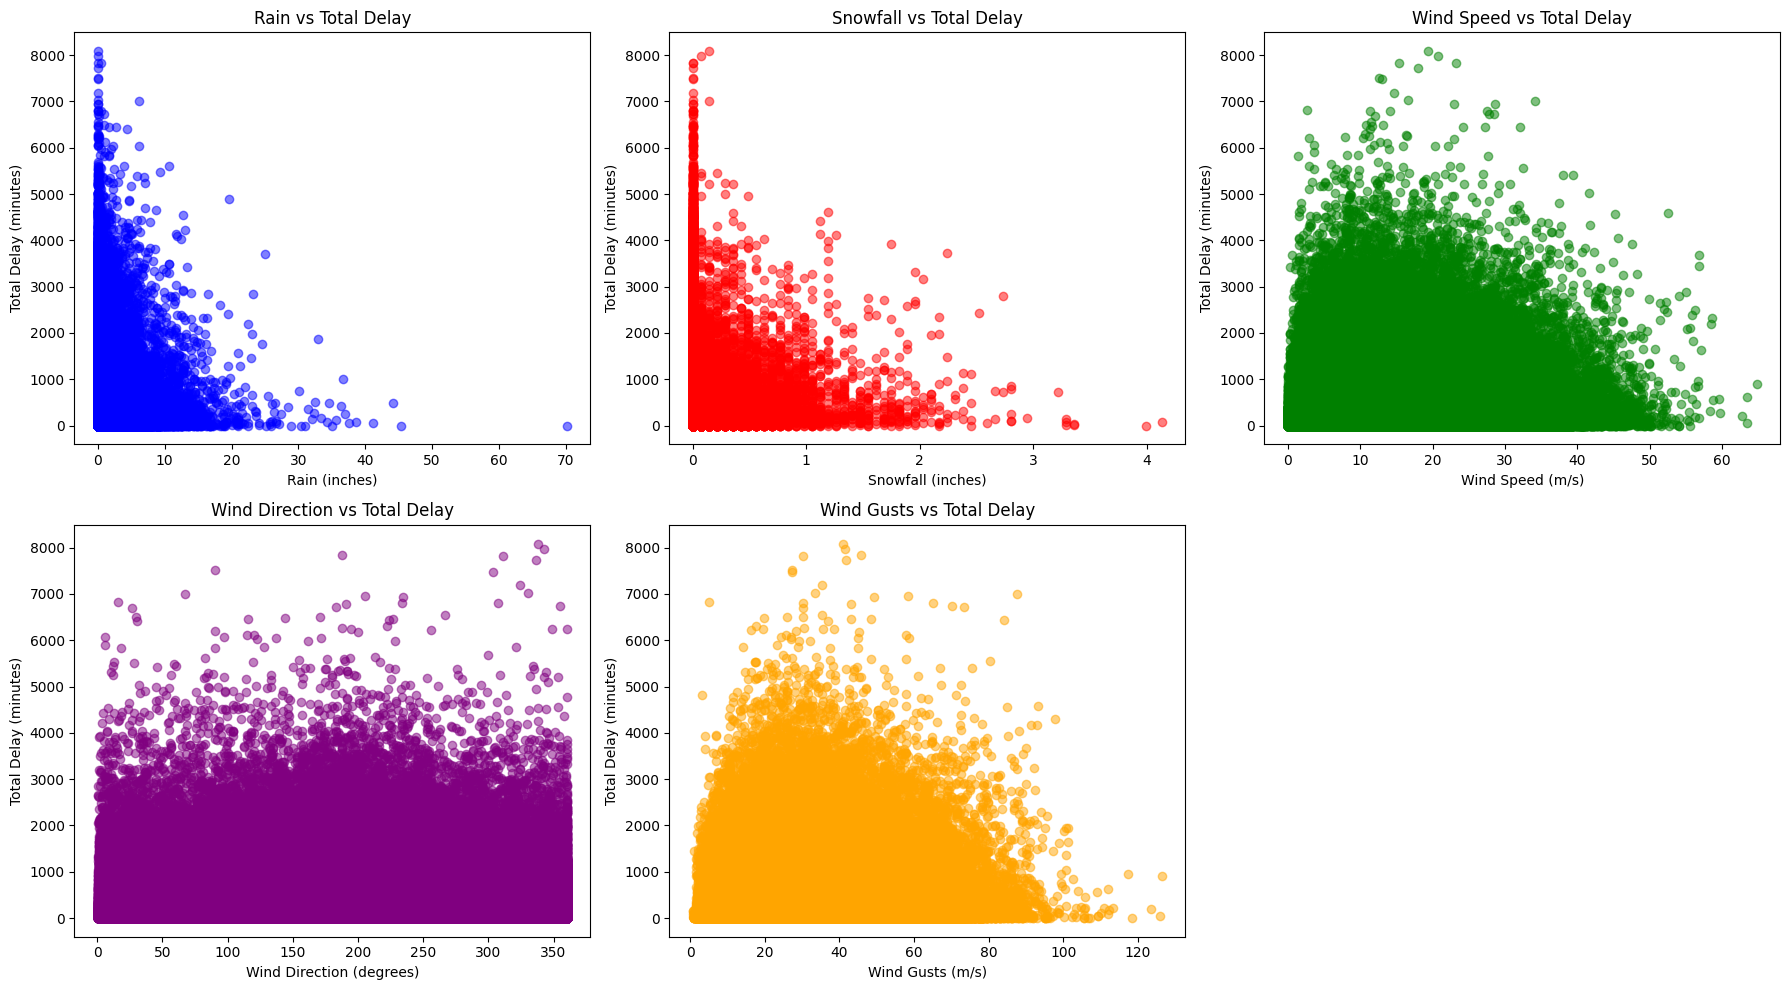

In [186]:
# trying to visualize the relationship

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].scatter(airport_hist_weather_delay['rain'], airport_hist_weather_delay['TOTAL_DELAY'], color='blue', alpha=0.5)
axes[0, 0].set_title('Rain vs Total Delay')
axes[0, 0].set_xlabel('Rain (inches)')
axes[0, 0].set_ylabel('Total Delay (minutes)')

axes[0, 1].scatter(airport_hist_weather_delay['snowfall'], airport_hist_weather_delay['TOTAL_DELAY'], color='red', alpha=0.5)
axes[0, 1].set_title('Snowfall vs Total Delay')
axes[0, 1].set_xlabel('Snowfall (inches)')
axes[0, 1].set_ylabel('Total Delay (minutes)')

axes[0, 2].scatter(airport_hist_weather_delay['wind_speed_10m'], airport_hist_weather_delay['TOTAL_DELAY'], color='green', alpha=0.5)
axes[0, 2].set_title('Wind Speed vs Total Delay')
axes[0, 2].set_xlabel('Wind Speed (m/s)')
axes[0, 2].set_ylabel('Total Delay (minutes)')

axes[1, 0].scatter(airport_hist_weather_delay['wind_direction_10m'], airport_hist_weather_delay['TOTAL_DELAY'], color='purple', alpha=0.5)
axes[1, 0].set_title('Wind Direction vs Total Delay')
axes[1, 0].set_xlabel('Wind Direction (degrees)')
axes[1, 0].set_ylabel('Total Delay (minutes)')

axes[1, 1].scatter(airport_hist_weather_delay['wind_gusts_10m'], airport_hist_weather_delay['TOTAL_DELAY'], color='orange', alpha=0.5)
axes[1, 1].set_title('Wind Gusts vs Total Delay')
axes[1, 1].set_xlabel('Wind Gusts (m/s)')
axes[1, 1].set_ylabel('Total Delay (minutes)')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [187]:
# Ranking Delay by Year and Month to try to get some insights 

airport_hist_weather_delay['Month'] = airport_hist_weather_delay['date'].dt.month
airport_hist_weather_delay['Year'] = airport_hist_weather_delay['date'].dt.year
year_month_delay = airport_hist_weather_delay.groupby(by =['Year', 'Month', 'airport_code'])['TOTAL_DELAY'].mean().reset_index()
year_month_delay['Rank'] = year_month_delay.groupby(['Year', 'Month'])['TOTAL_DELAY'].rank(ascending = False)
sorted_year_month_delay = year_month_delay.sort_values(by= ['Year', 'Month', 'Rank'])

In [188]:
sorted_year_month_delay

Year  Month airport_code  TOTAL_DELAY  Rank
9     2014      7          LAX   459.552013   1.0
18    2014      7          SFO   412.316225   2.0
4     2014      7          DFW   331.001692   3.0
3     2014      7          DEN   329.702381   4.0
7     2014      7          JFK   327.257426   5.0
...    ...    ...          ...          ...   ...
2878  2024      6          SNA   143.708716  20.0
2868  2024      6          MSY   143.339114  21.0
2877  2024      6          SMF   134.943431  22.0
2862  2024      6          HOU   129.772455  23.0
2875  2024      6          SJC   105.686598  24.0

[2880 rows x 5 columns]

## Checking The Differences in Correlation plots for each Airports

In [189]:
import pandas as pd
# creating a dictionary of correlation dataframes for each airport
weather_columns = ['rain', 'snowfall', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m', 'TOTAL_DELAY']
airport_groups = airport_hist_weather_delay.groupby('airport_code')
airport_correlations = {}
for airport, group in airport_groups:
    airport_data = group[weather_columns]
    correlation_matrix = airport_data.corr()
    airport_correlations[airport] = correlation_matrix



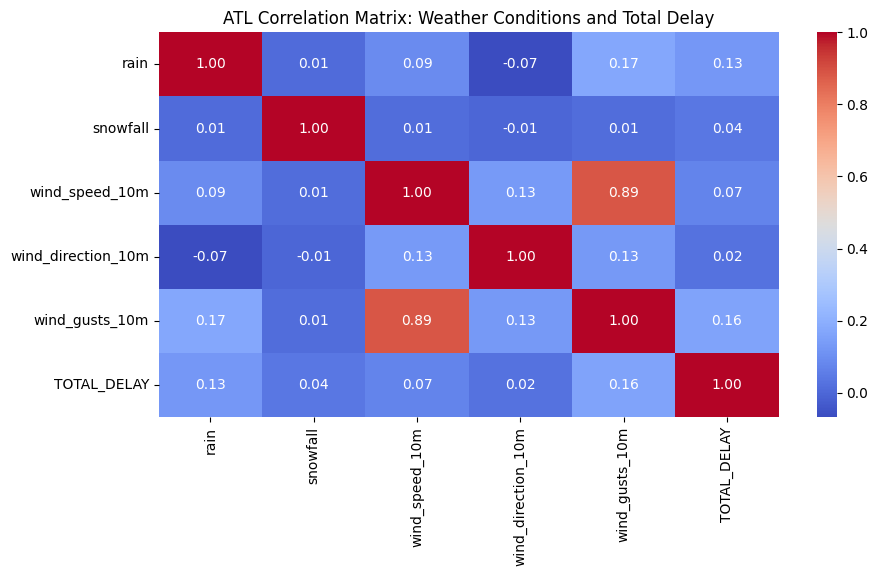

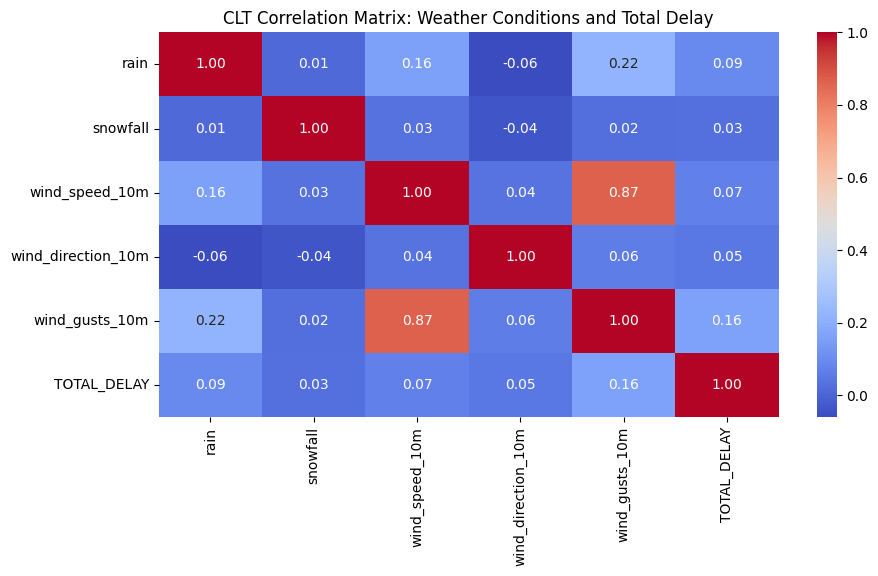

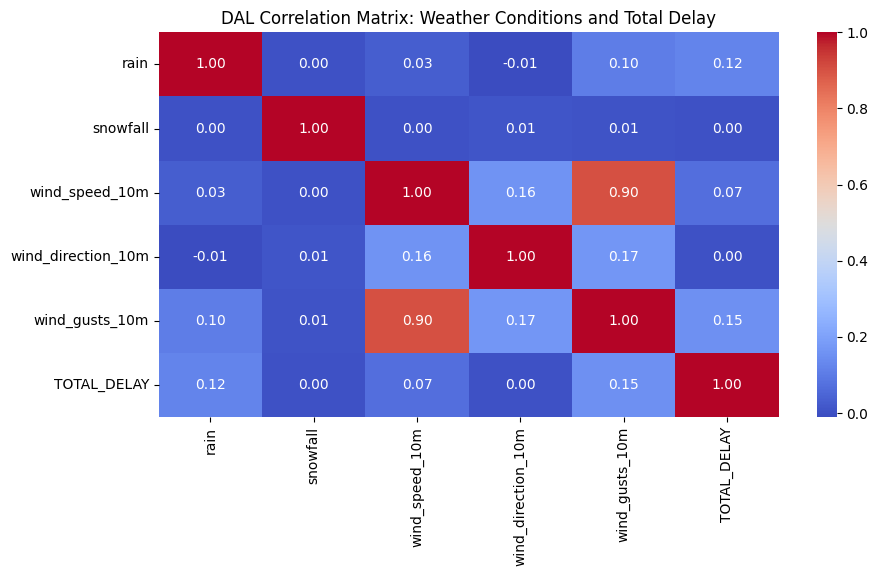

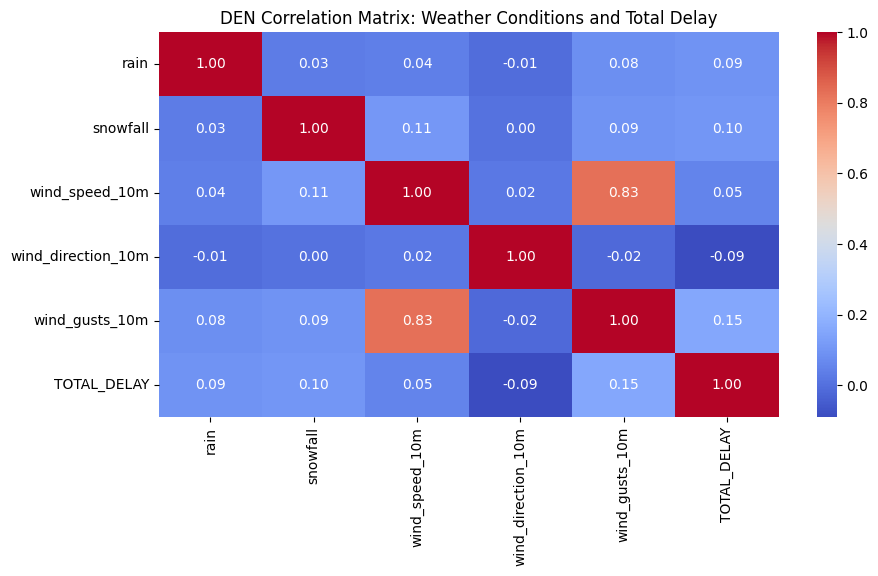

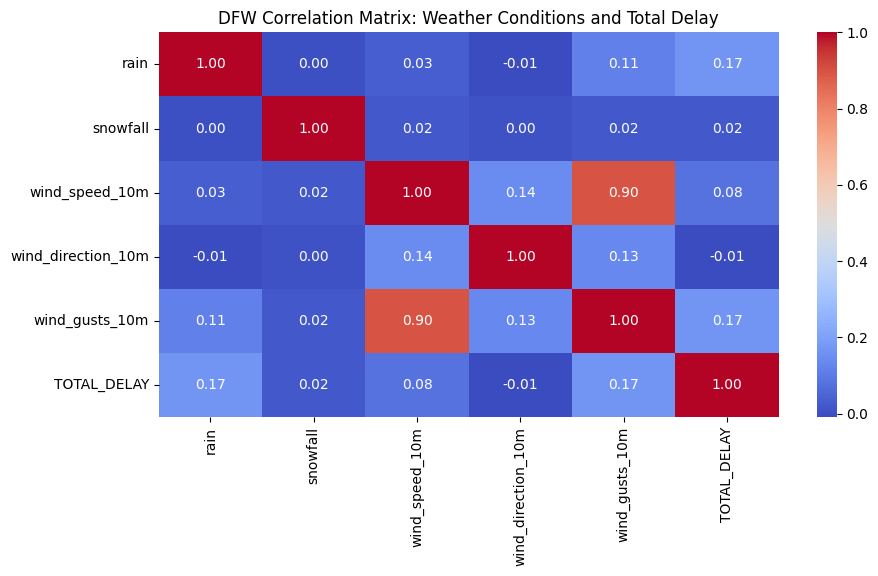

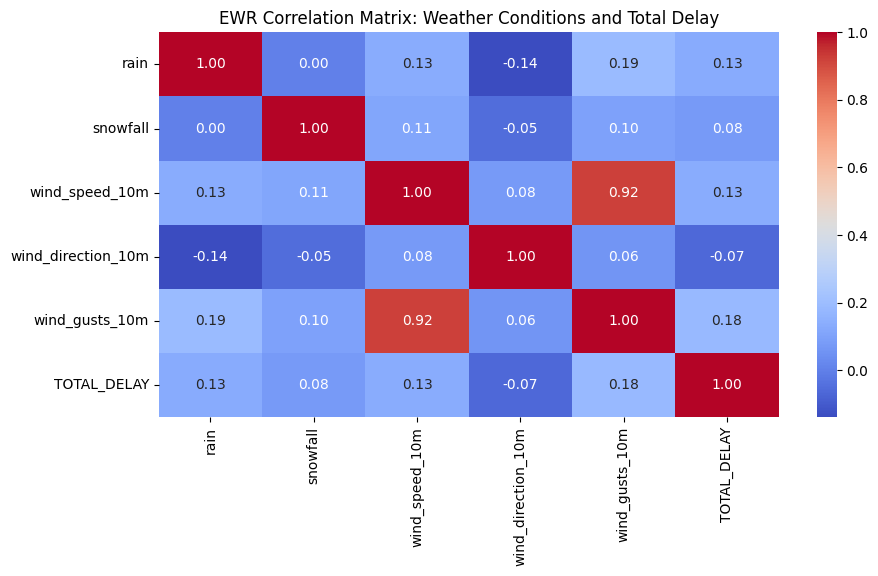

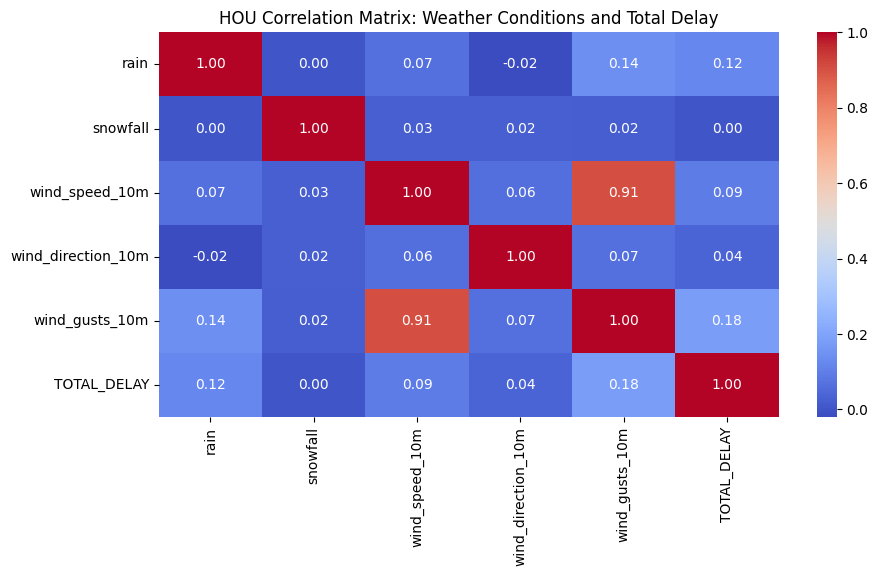

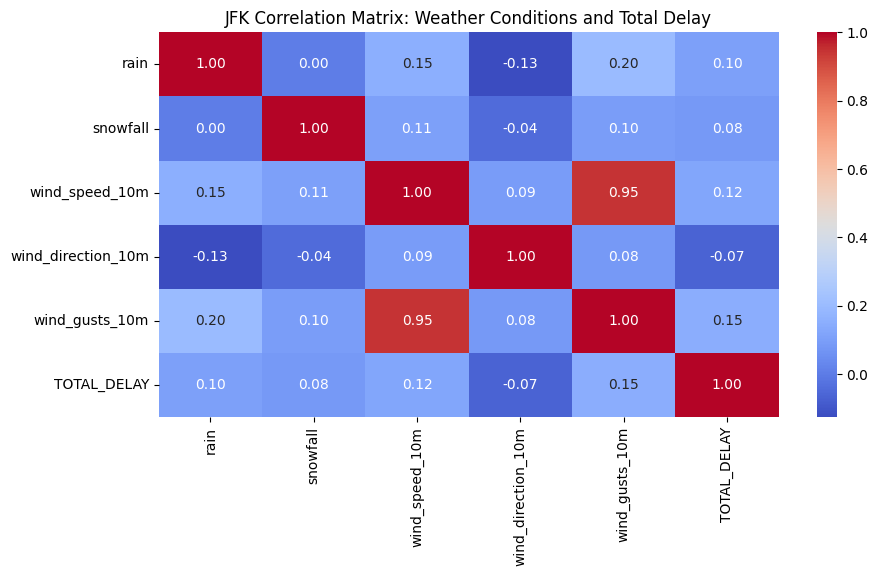

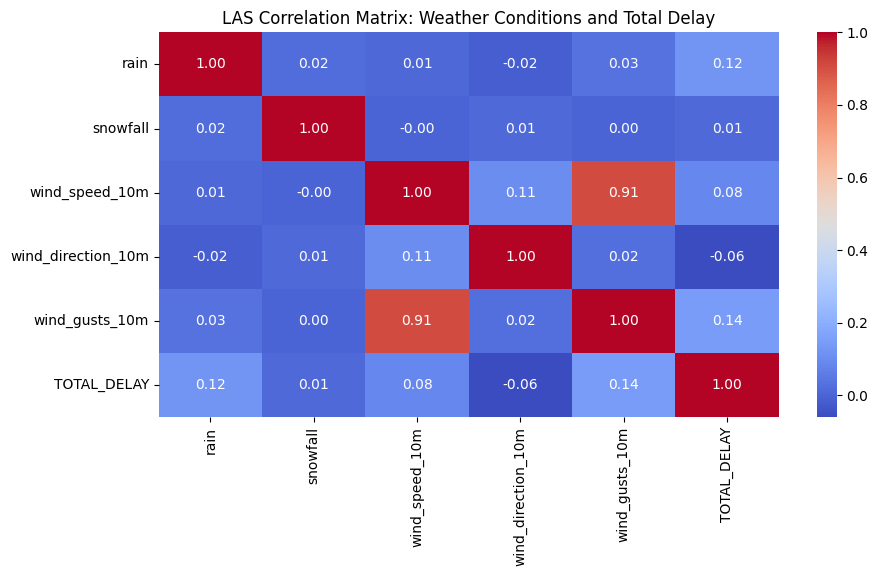

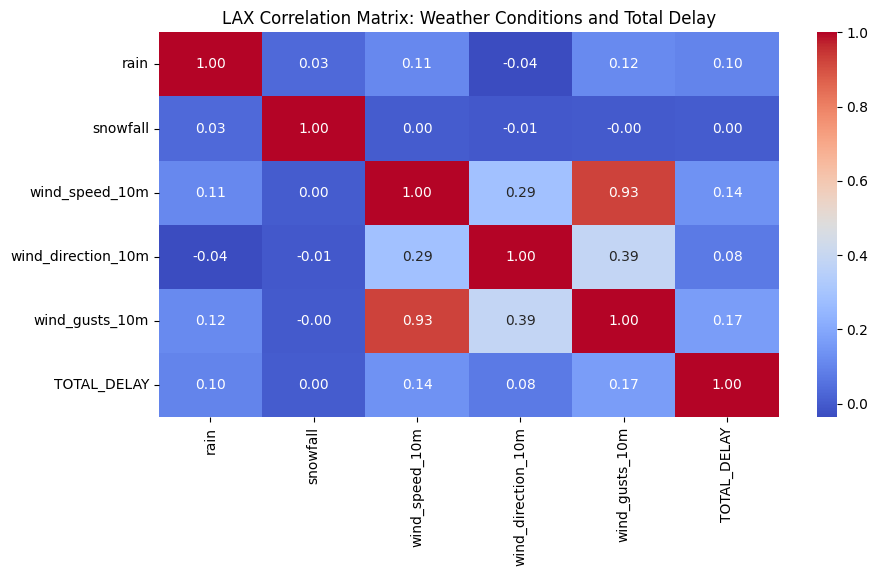

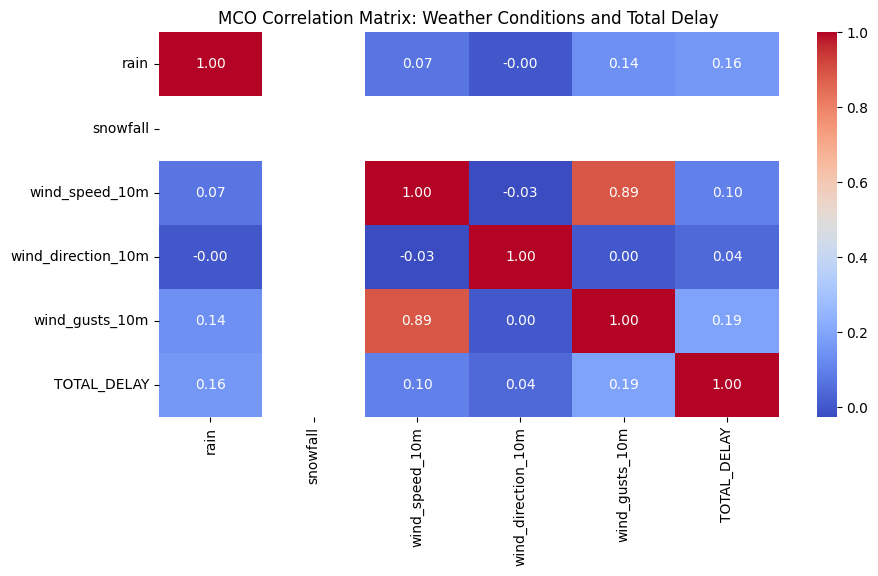

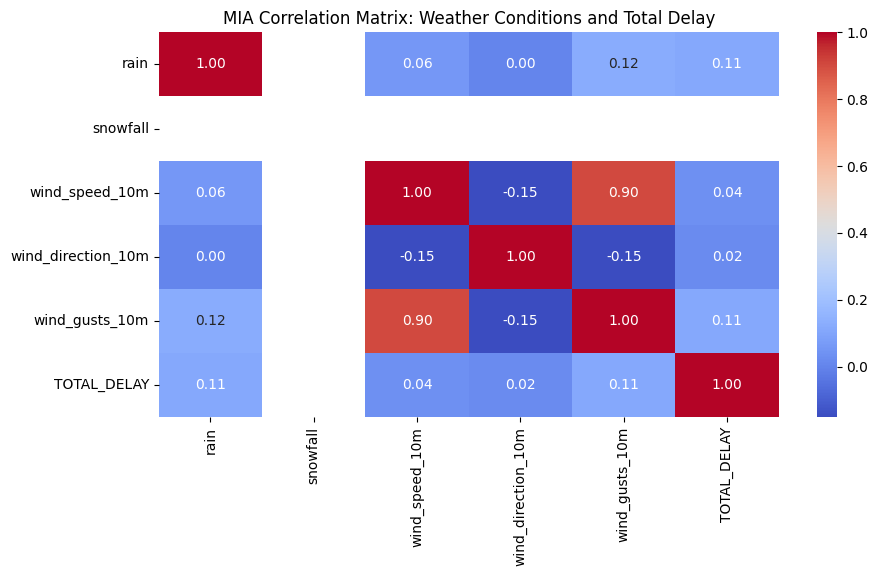

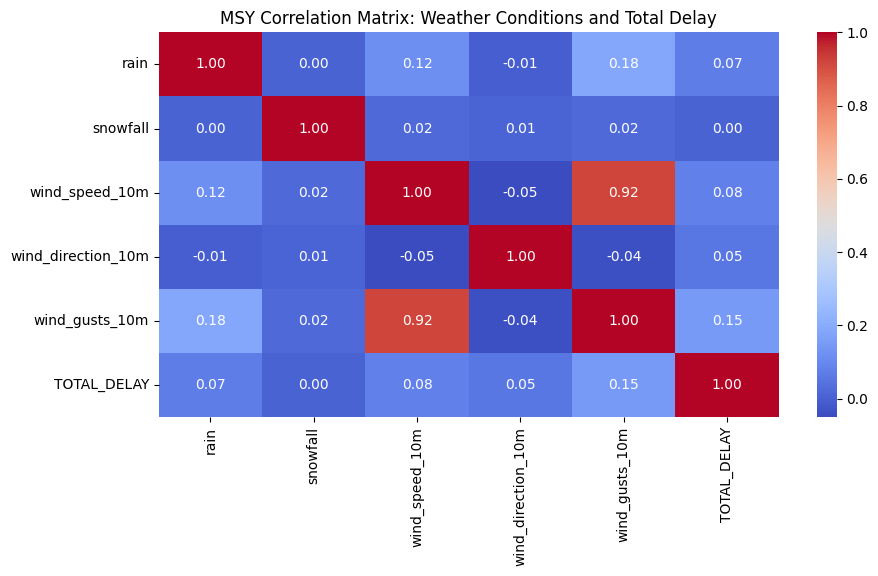

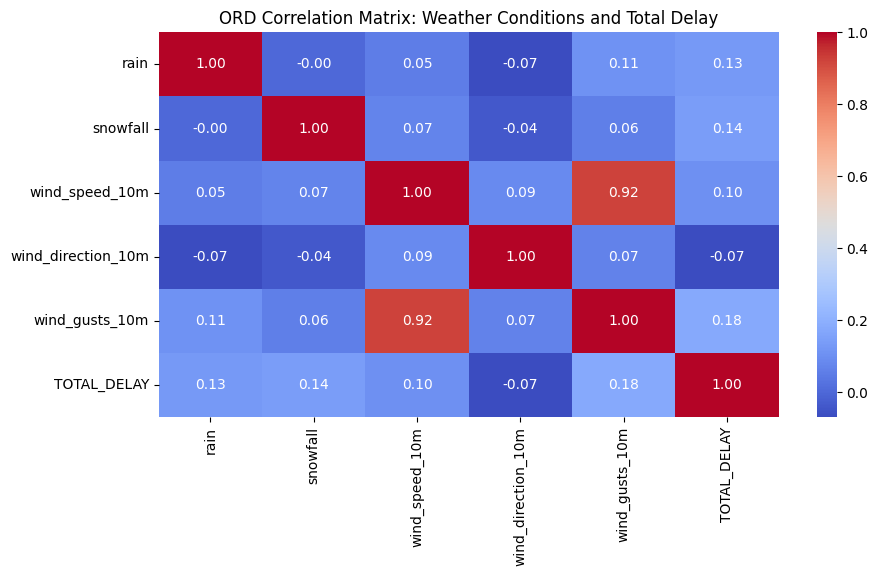

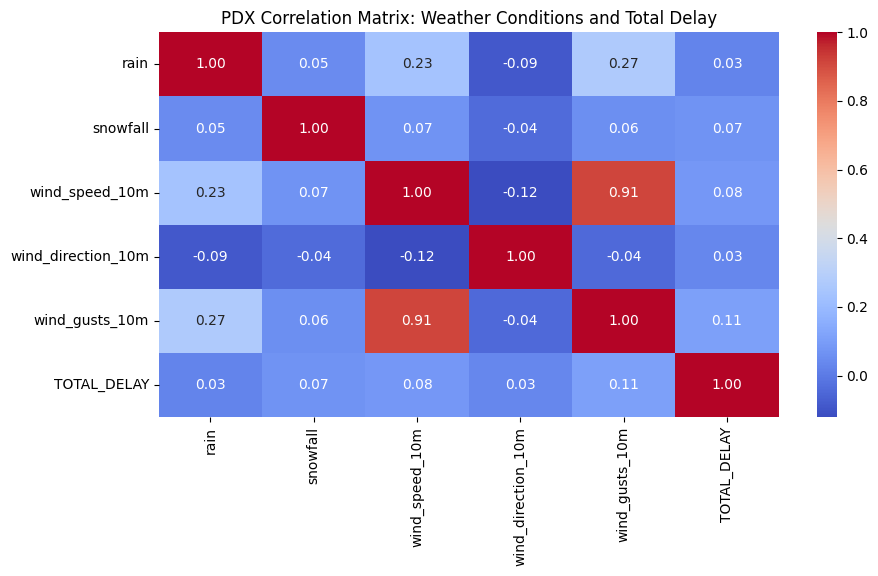

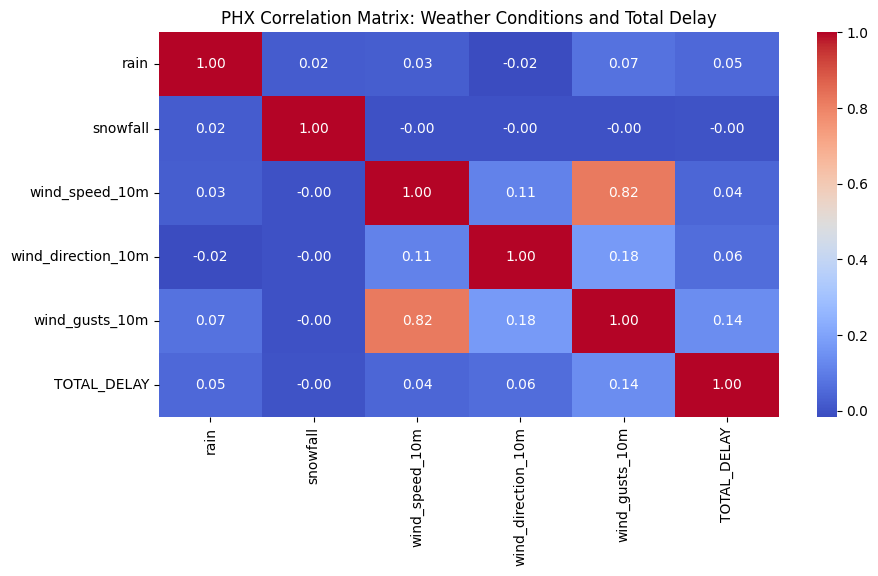

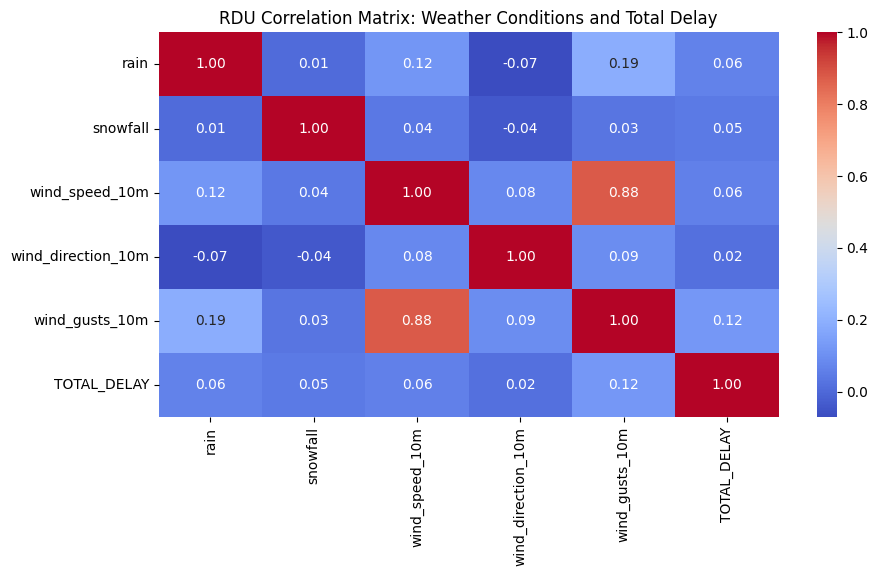

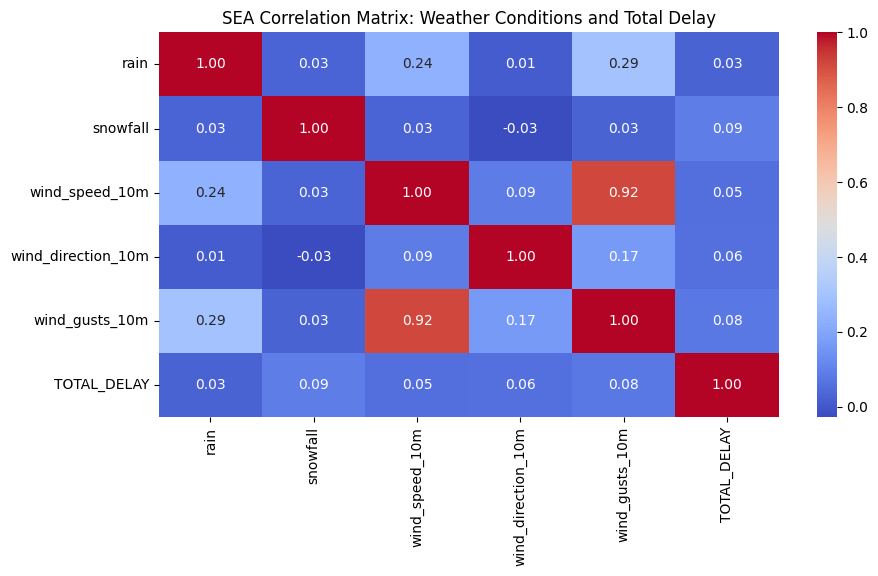

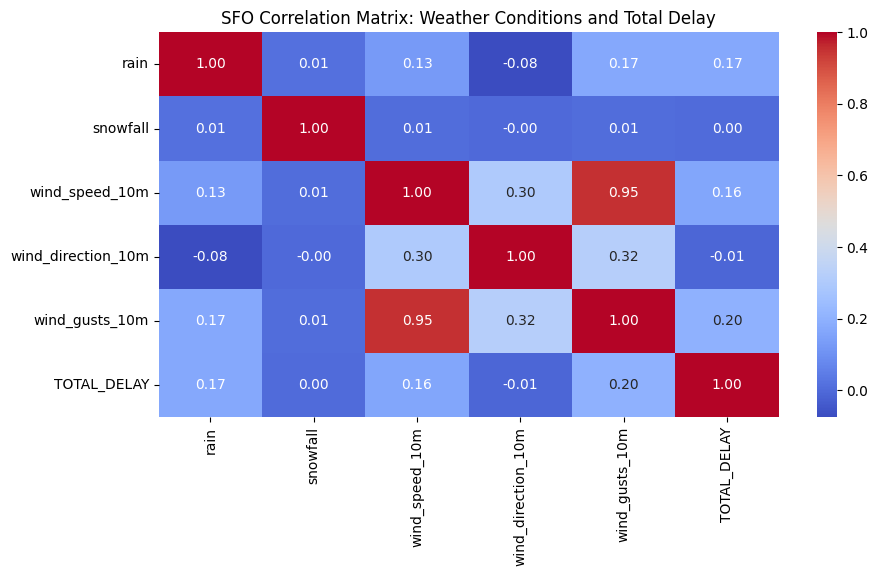

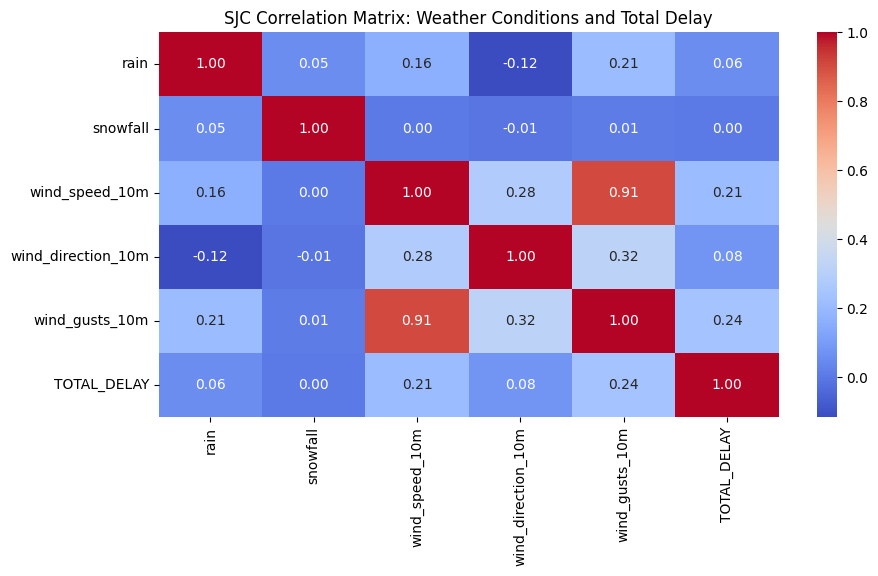

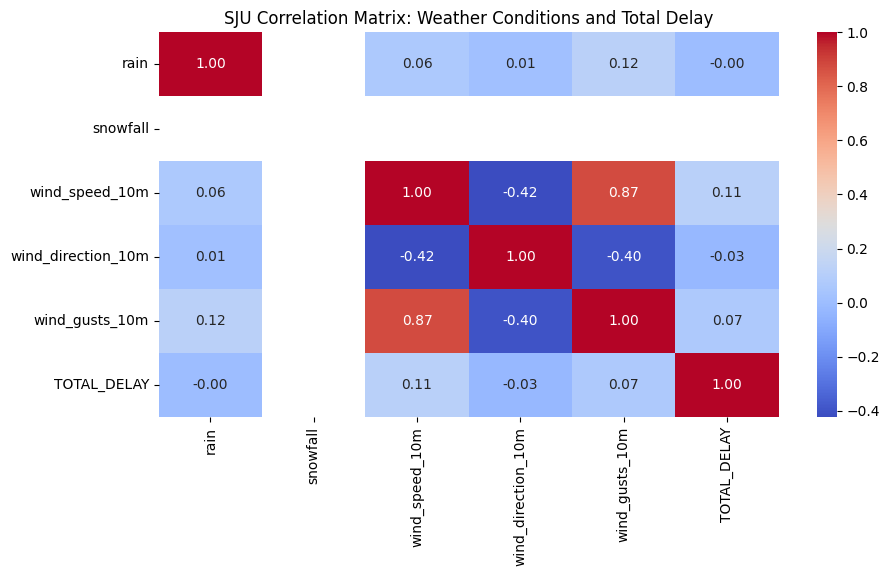

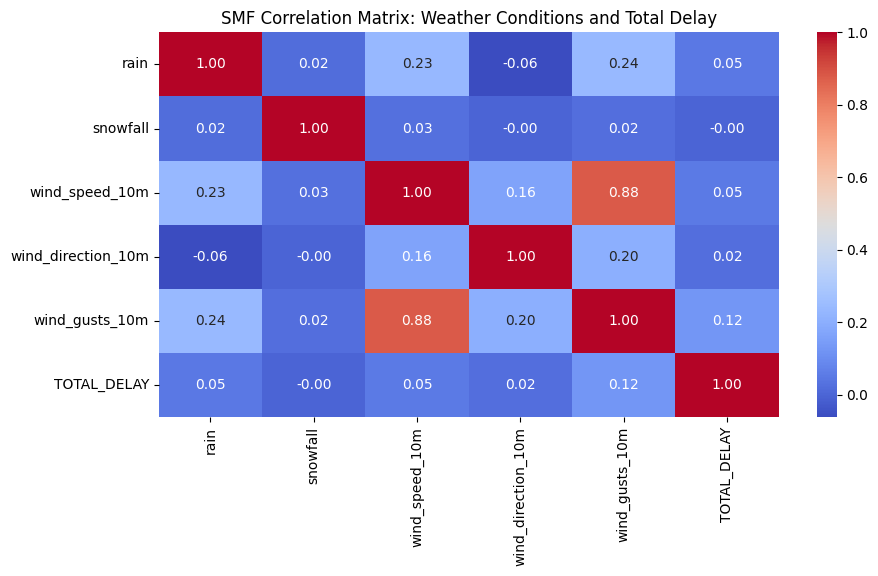

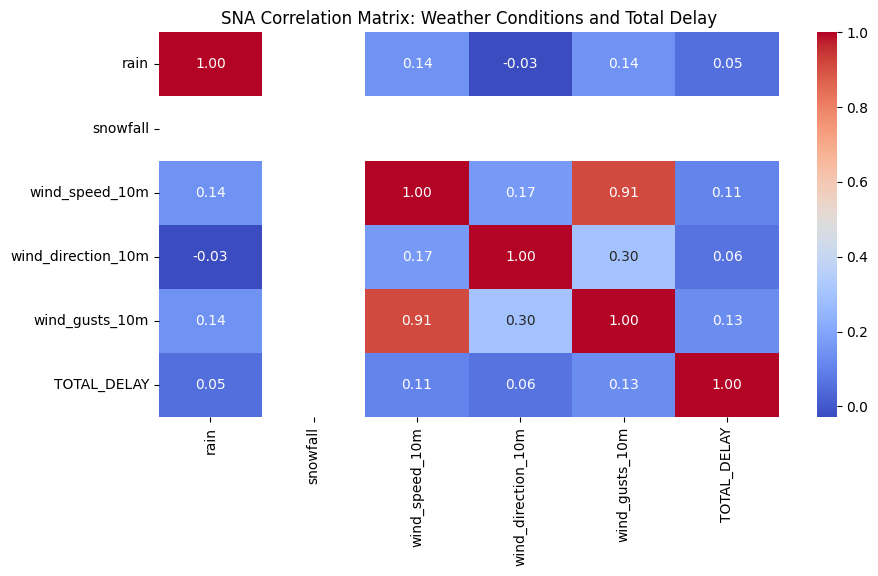

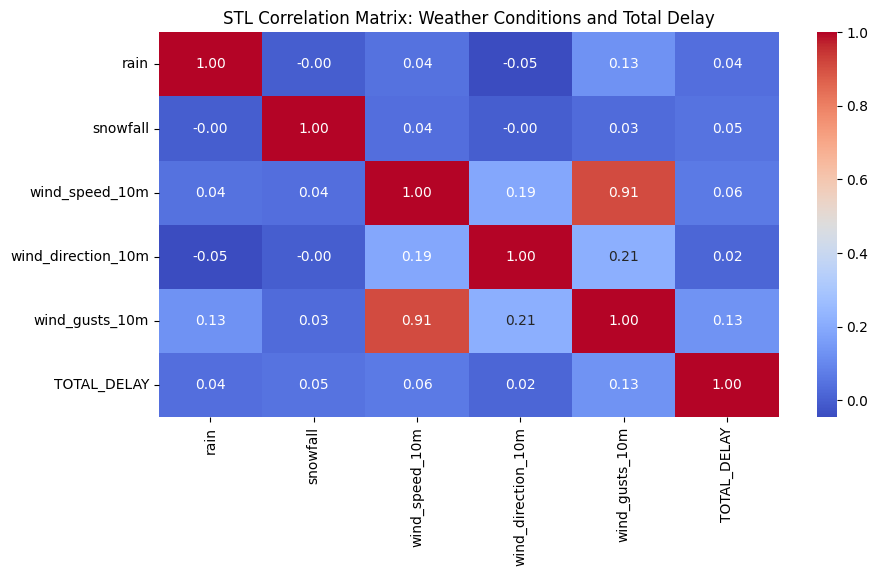

In [304]:
# plotting them all 
for airport, corr_matrix in airport_correlations.items():
    plt.figure(figsize=(10, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('{} Correlation Matrix: Weather Conditions and Total Delay'.format(airport))
    plt.show()

## Weather Condtions Severity Trends and Delay 

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\411984819.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  snowfall_delay = airport_hist_weather_delay.groupby(snowfall_bins)['TOTAL_DELAY'].mean()
C:\Users\youss\AppData\Local\Temp\ipykernel_24372\411984819.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_delay = airport_hist_weather_delay.groupby(rainfall_bins)['TOTAL_DELAY'].mean()
C:\Users\youss\AppData\Local\Temp\ipykernel_24372\411984819.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

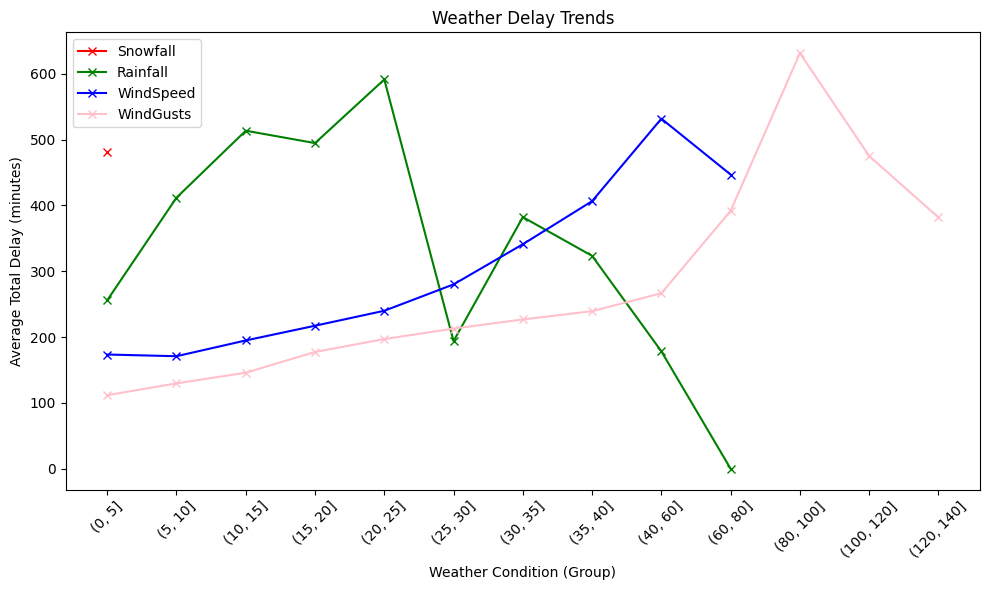

In [191]:
# Plotting the trends of weather conditions by bins and the delay

custom_general_bins = [0,5,10,15,20,25,30,35,40,60,80,100,120,140,180,220,260,300]
snowfall_bins = pd.cut(airport_hist_weather_delay['snowfall'], bins=custom_general_bins)
rainfall_bins = pd.cut(airport_hist_weather_delay['rain'], bins=custom_general_bins)
windspeed_bins = pd.cut(airport_hist_weather_delay['wind_speed_10m'], bins=custom_general_bins)
windgusts_bins = pd.cut(airport_hist_weather_delay['wind_gusts_10m'], bins=custom_general_bins)


snowfall_delay = airport_hist_weather_delay.groupby(snowfall_bins)['TOTAL_DELAY'].mean()
rainfall_delay = airport_hist_weather_delay.groupby(rainfall_bins)['TOTAL_DELAY'].mean()
windspeed_delay = airport_hist_weather_delay.groupby(windspeed_bins)['TOTAL_DELAY'].mean()
windgust_delay = airport_hist_weather_delay.groupby(windgusts_bins)['TOTAL_DELAY'].mean()

plt.figure(figsize=(10, 6))

plt.plot(snowfall_delay.index.astype(str), snowfall_delay, color='red', label='Snowfall', marker='x')

plt.plot(rainfall_delay.index.astype(str), rainfall_delay, color='green', label='Rainfall', marker='x')

plt.plot(windspeed_delay.index.astype(str), windspeed_delay, color='blue', label='WindSpeed', marker='x')

plt.plot(windgust_delay.index.astype(str), windgust_delay, color='pink', label='WindGusts', marker='x')


plt.title('Weather Delay Trends')
plt.xlabel('Weather Condition (Group)')
plt.ylabel('Average Total Delay (minutes)')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Graphing the each Weather Conditon Trend and the Delay at Airports

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\114460246.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_bins])['TOTAL_DELAY'].mean().unstack()


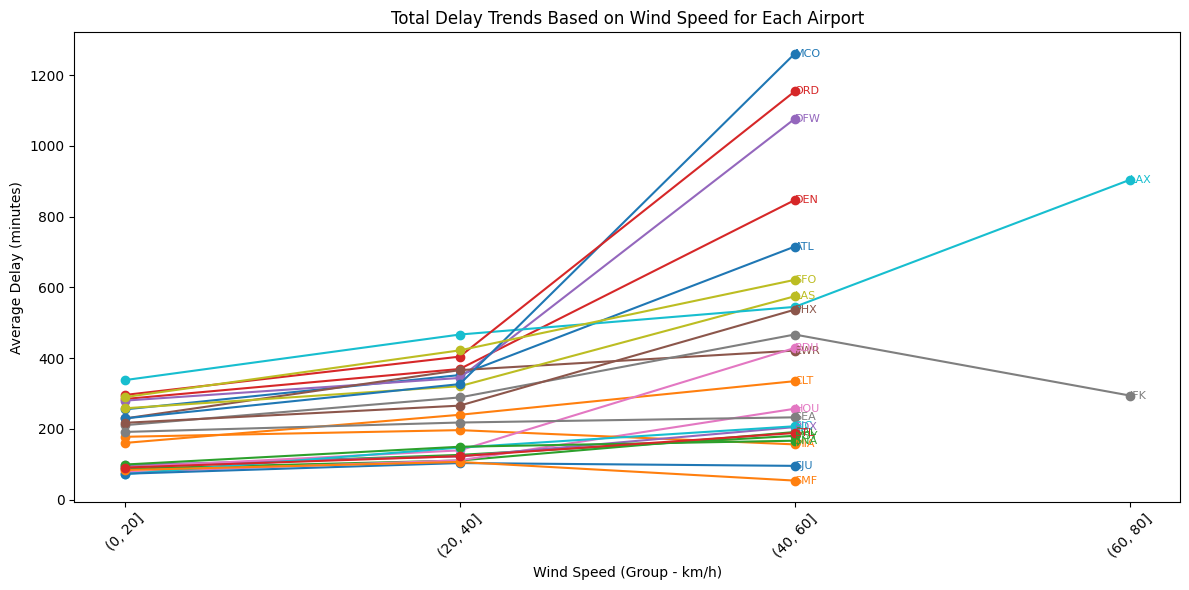

In [284]:
custom_bins_wind = [0, 20, 40, 60, 80, 100, 120, 140]  
wind_bins = pd.cut(airport_hist_weather_delay['wind_speed_10m'], bins=custom_bins_wind)

grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_bins])['TOTAL_DELAY'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Total Delay Trends Based on Wind Speed for Each Airport')
plt.xlabel('Wind Speed (Group - km/h)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)


plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\755983878.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_delay.groupby(['airport_code', snowfall_bins])['TOTAL_DELAY'].mean().unstack()


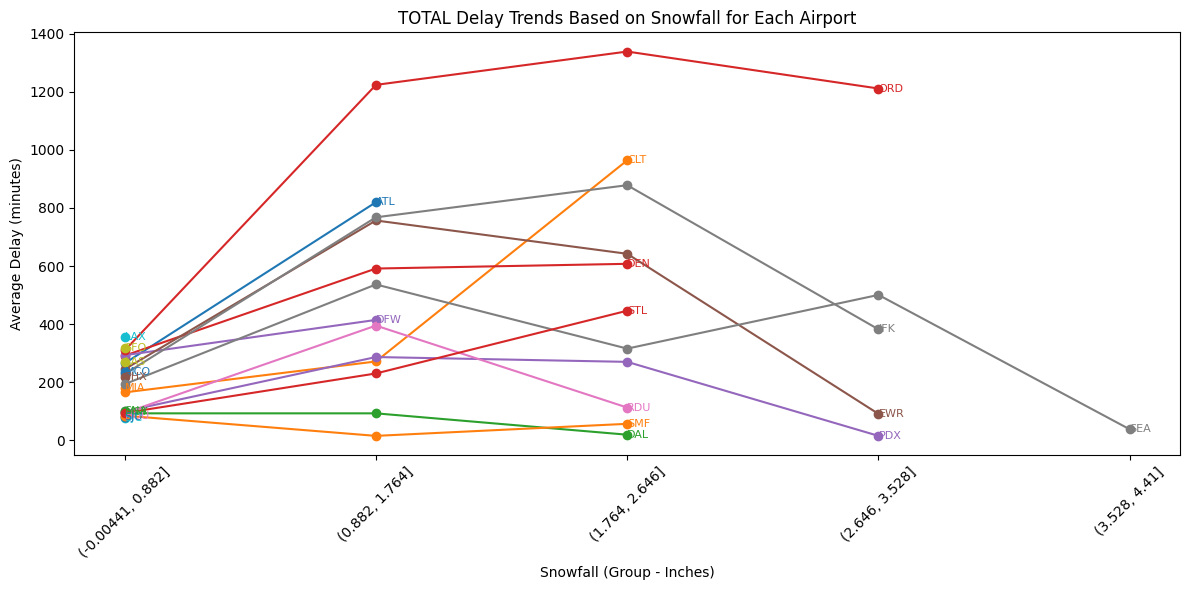

In [281]:
bins = 5  
snowfall_bins = pd.cut(airport_hist_weather_delay['snowfall'], bins=bins)

grouped_data = airport_hist_weather_delay.groupby(['airport_code', snowfall_bins])['TOTAL_DELAY'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('TOTAL Delay Trends Based on Snowfall for Each Airport')
plt.xlabel('Snowfall (Group - Inches)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\3482490949.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_gust_bins])['TOTAL_DELAY'].mean().unstack()


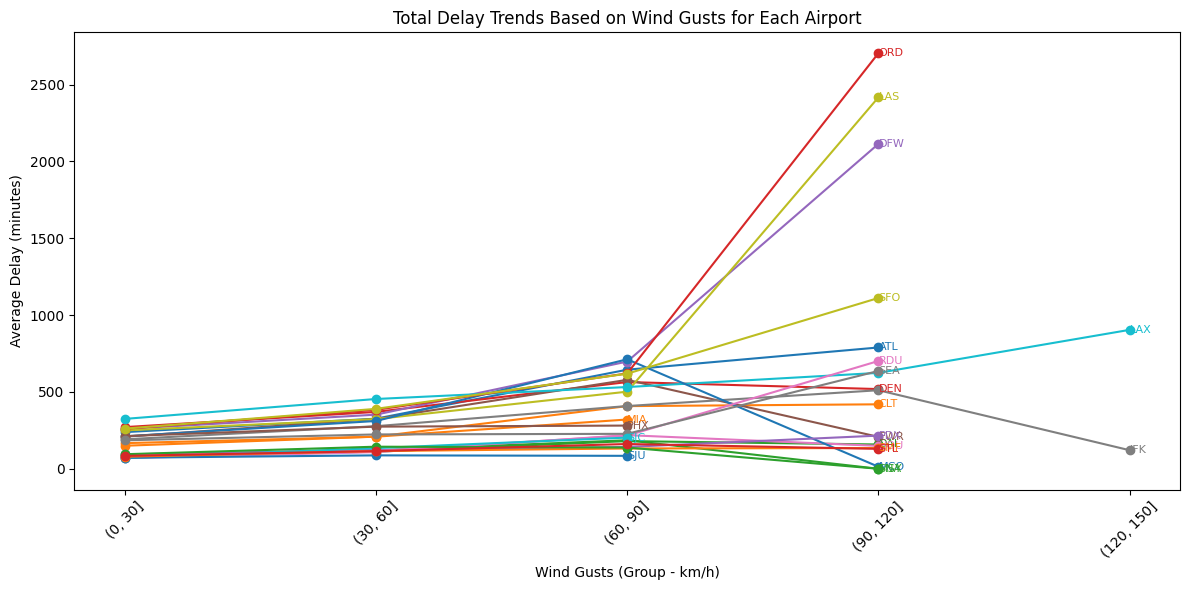

In [283]:
custom_bins_gust = [0, 30, 60, 90, 120, 150, 180, 210,240,270,300] 

wind_gust_bins = pd.cut(airport_hist_weather_delay['wind_gusts_10m'], bins=custom_bins_gust)

grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_gust_bins])['TOTAL_DELAY'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Total Delay Trends Based on Wind Gusts for Each Airport')
plt.xlabel('Wind Gusts (Group - km/h)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

## Investigating The Airpots that have consistent trends 

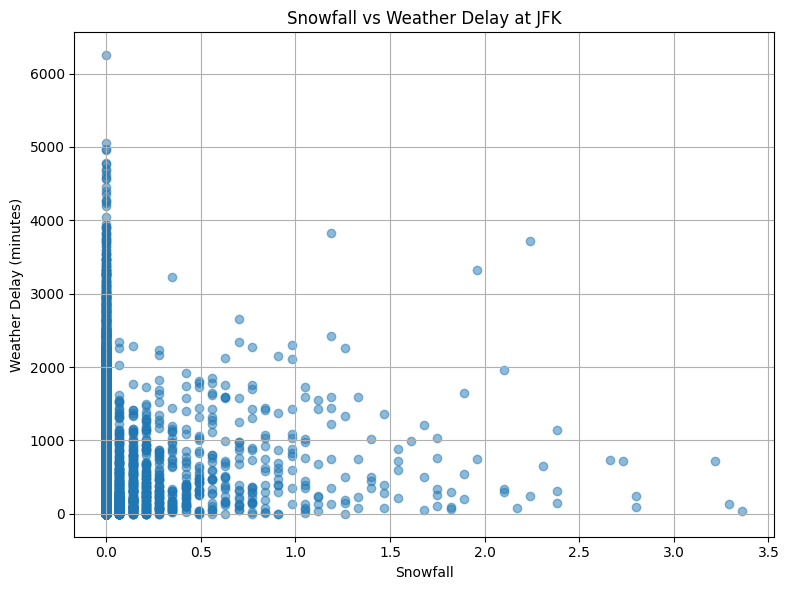

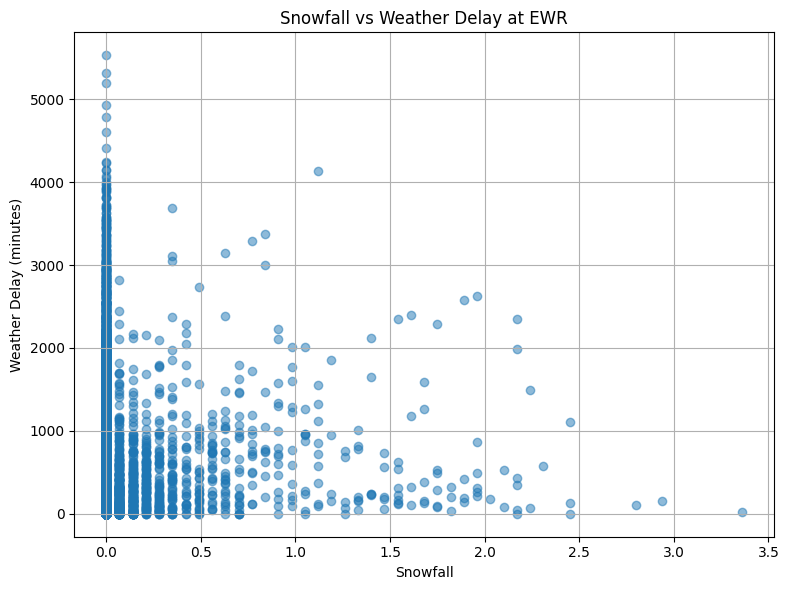

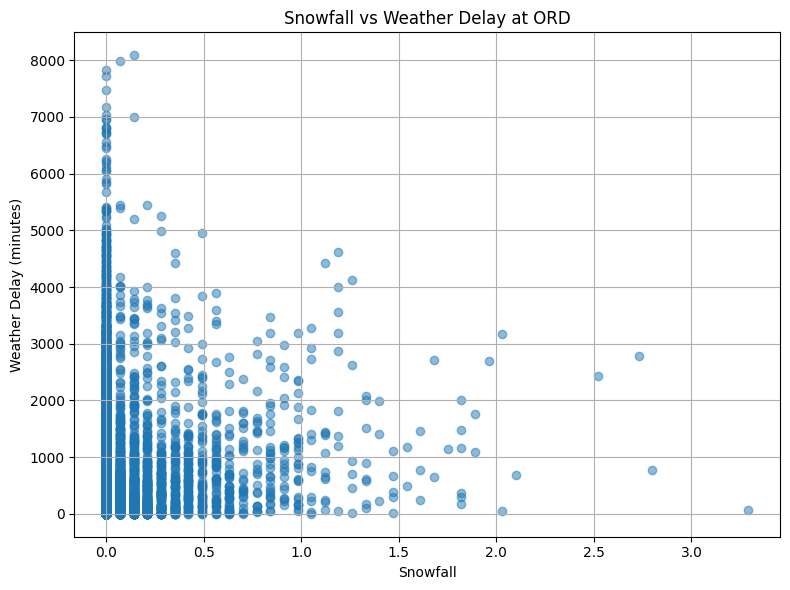

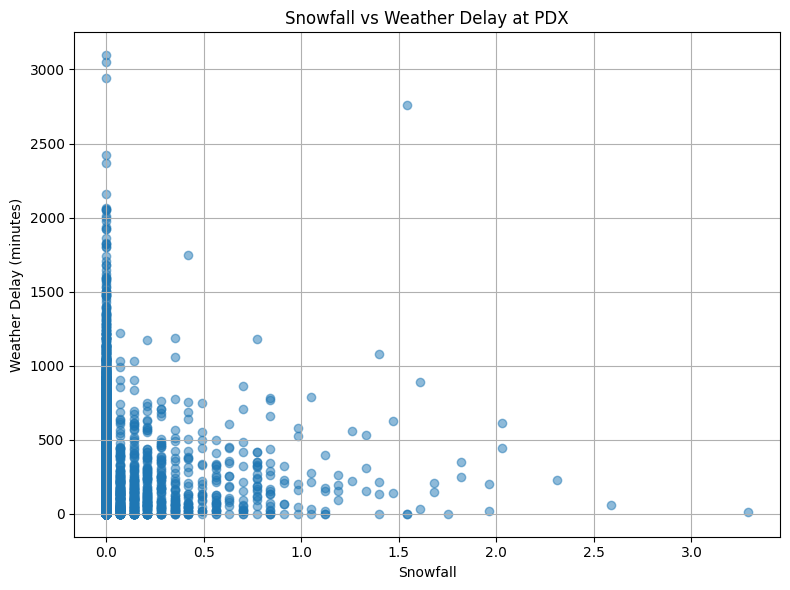

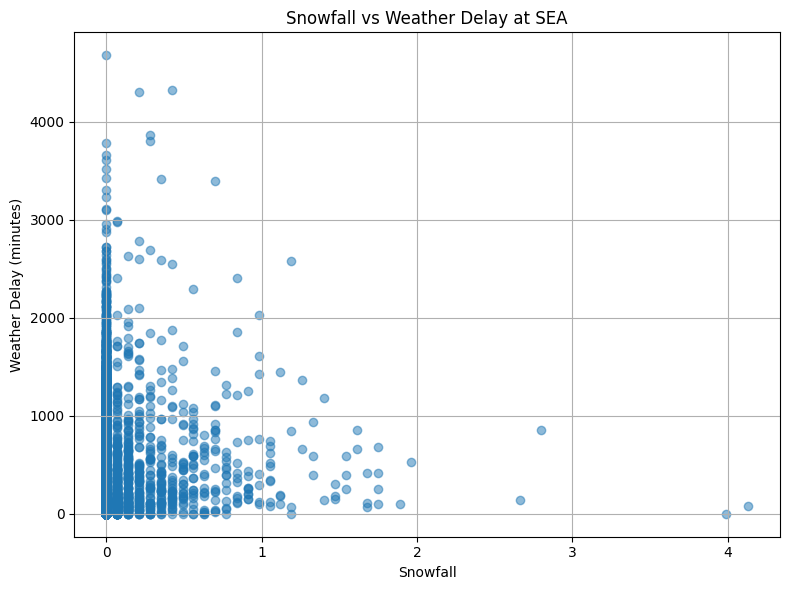

In [195]:
airports = ['JFK', 'EWR', 'ORD', 'PDX', 'SEA']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['snowfall']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['TOTAL_DELAY'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Weather Delay (minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\1799442002.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


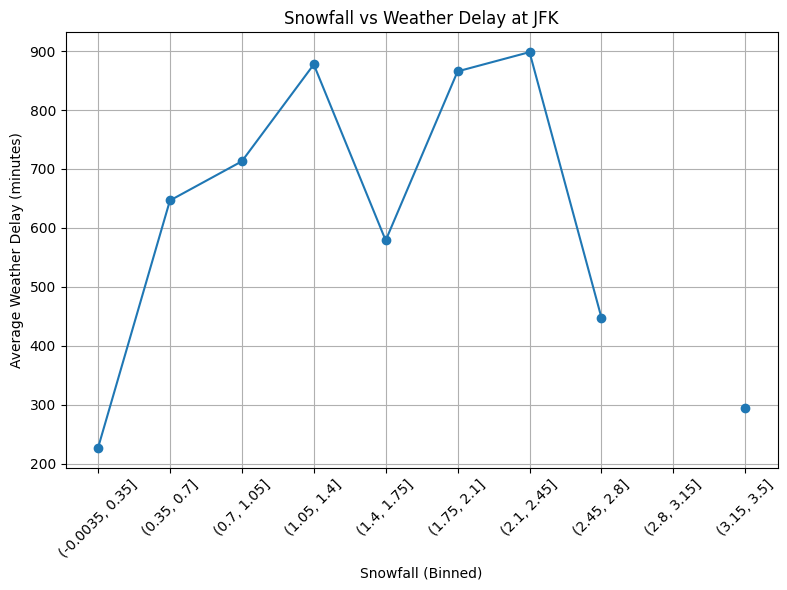

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\1799442002.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


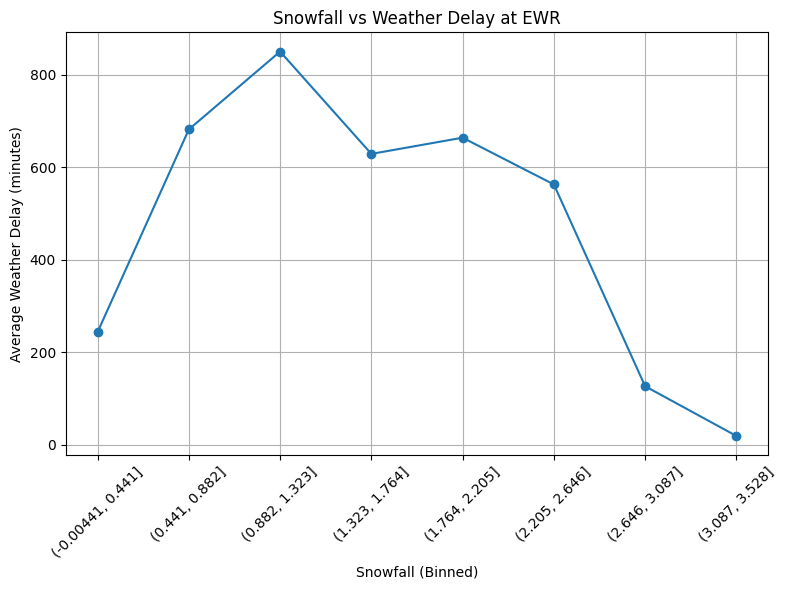

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\1799442002.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


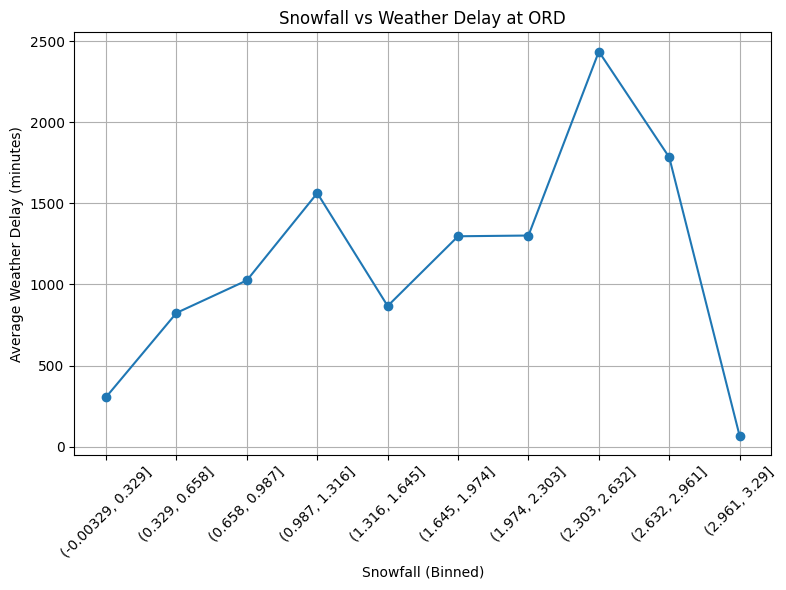

In [196]:
airports = ['JFK', 'EWR', 'ORD']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['snowfall']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()
        
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

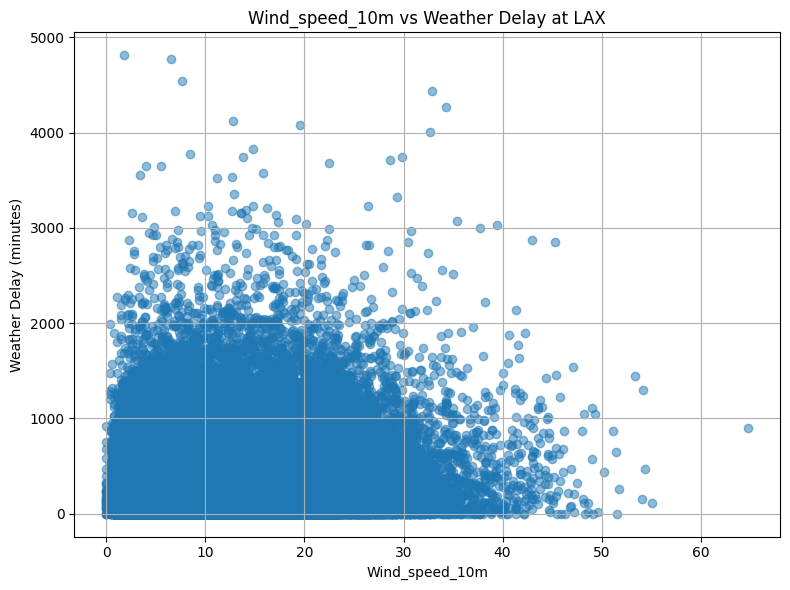

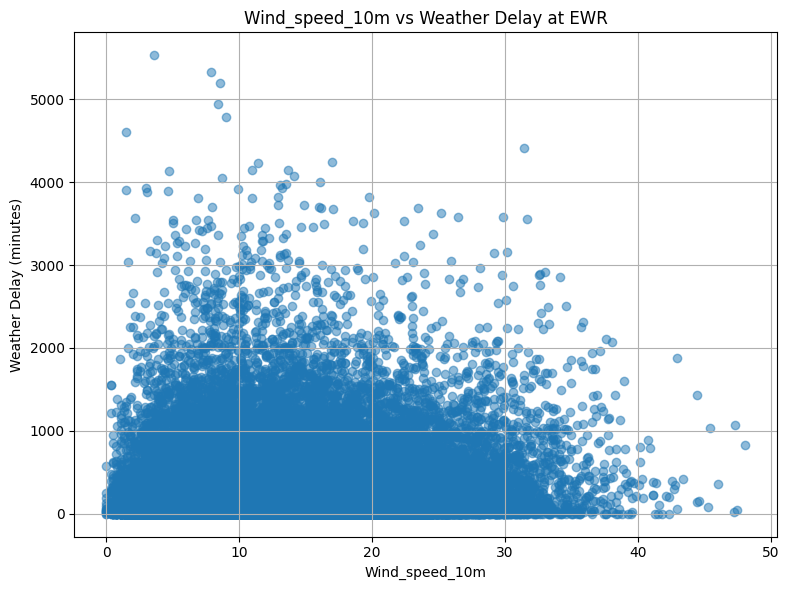

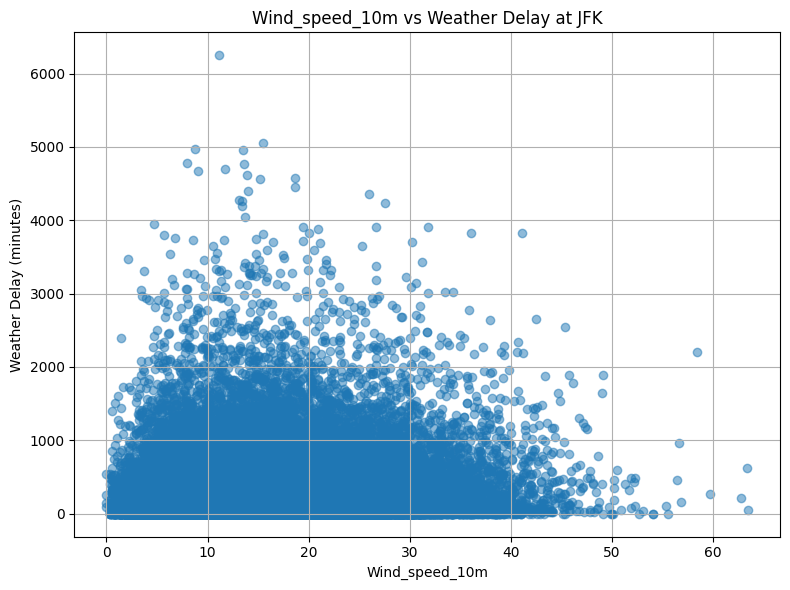

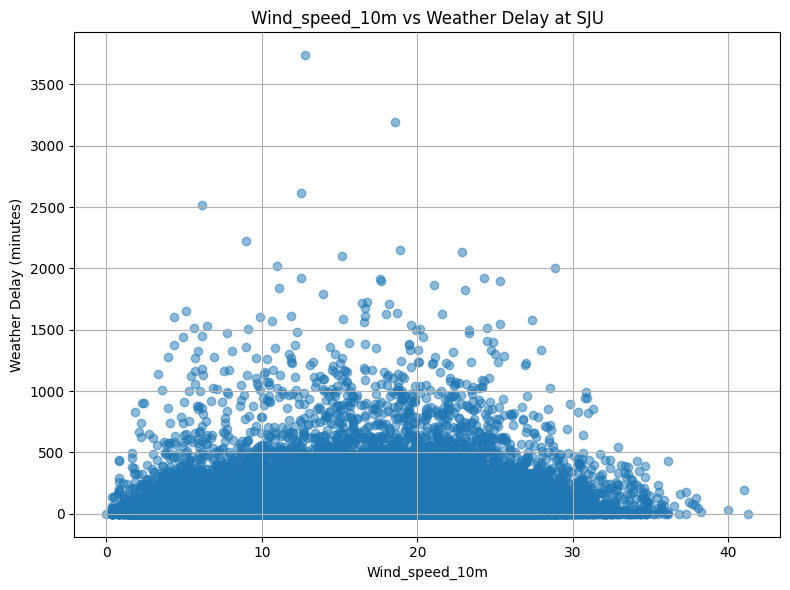

In [288]:
airports = ['LAX', 'EWR', 'JFK', 'SJU']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_speed_10m']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['TOTAL_DELAY'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Weather Delay (minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2231535221.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


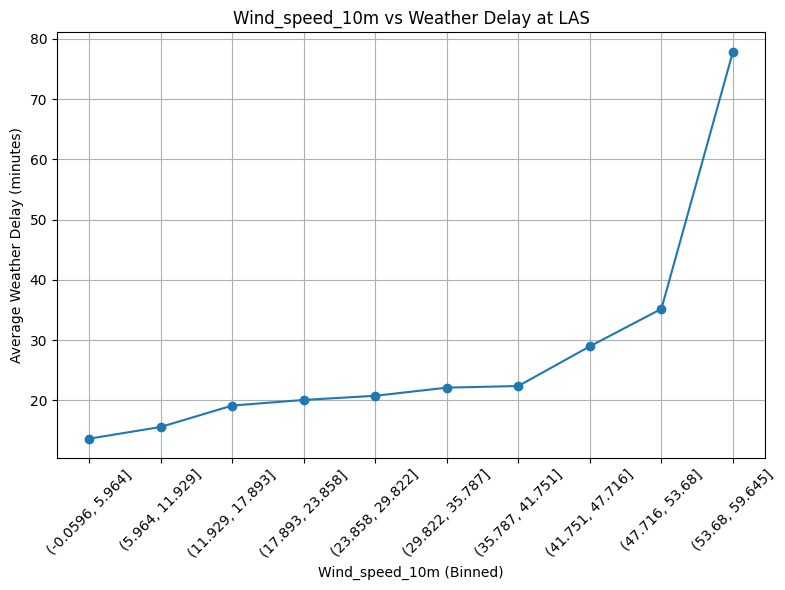

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2231535221.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


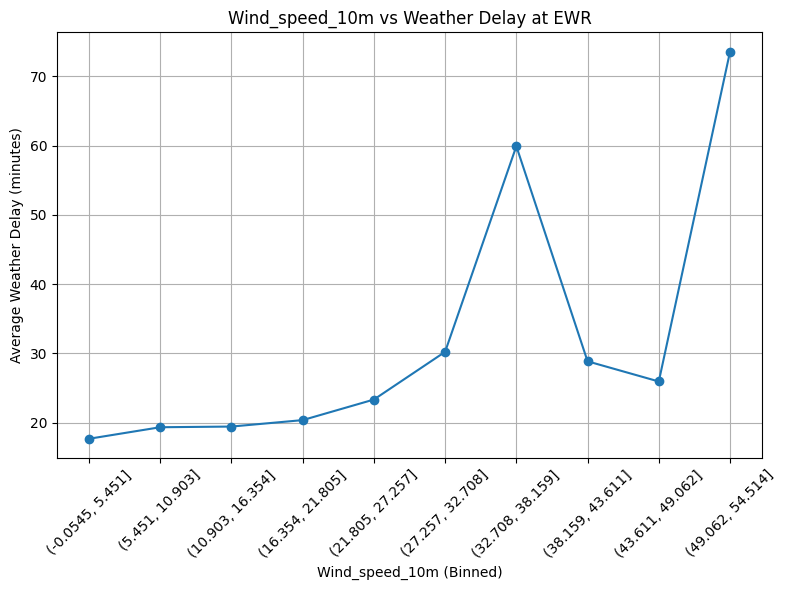

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2231535221.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


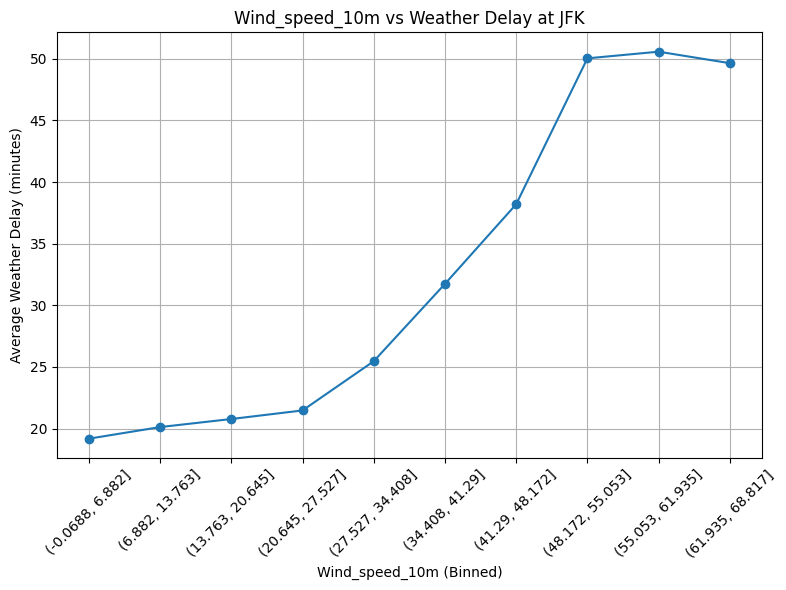

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2231535221.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


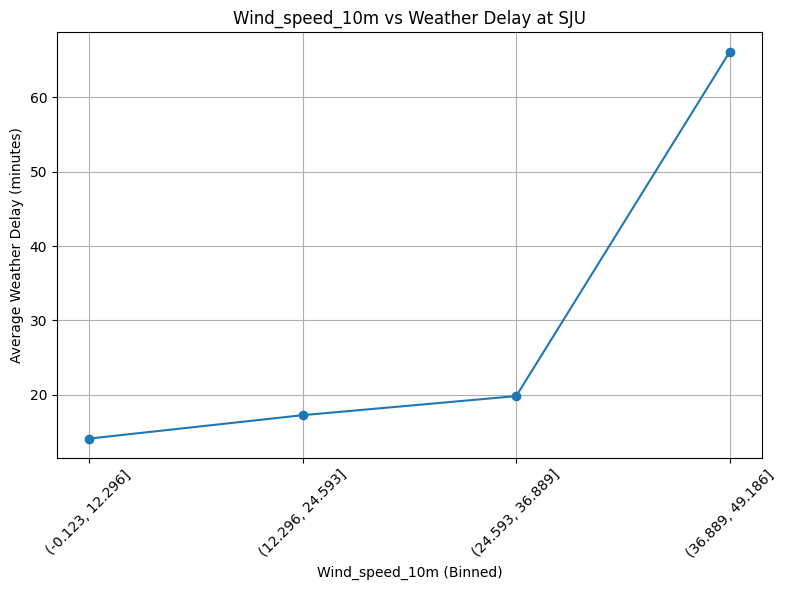

In [43]:
airports = ['LAS', 'EWR', 'JFK', 'SJU']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_speed_10m']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()
        
        # Plot the line plot
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

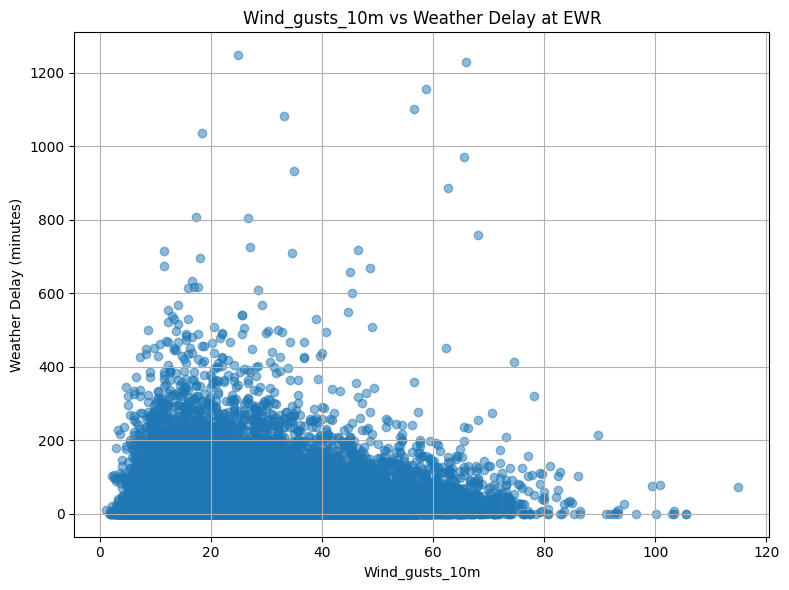

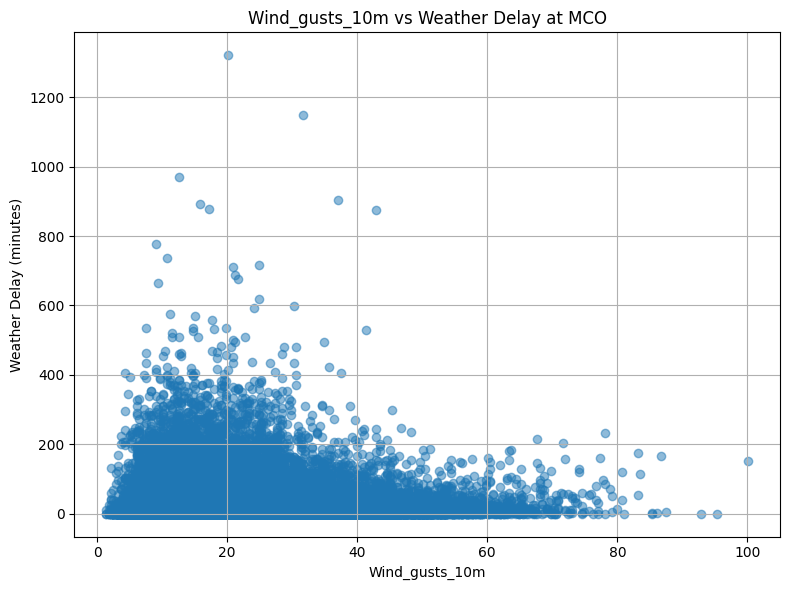

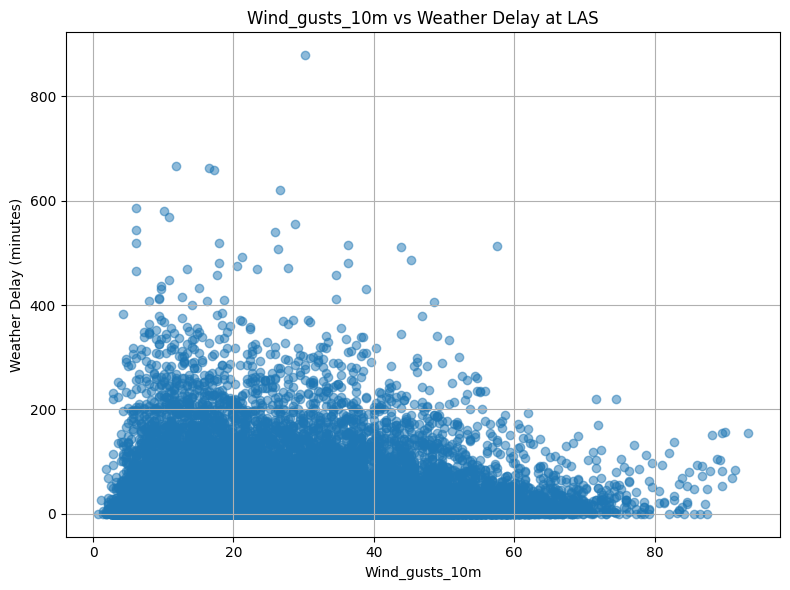

In [44]:
airports = ['EWR', 'MCO', 'LAS']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_gusts_10m']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['TOTAL_DELAY'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Weather Delay (minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\3391558497.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


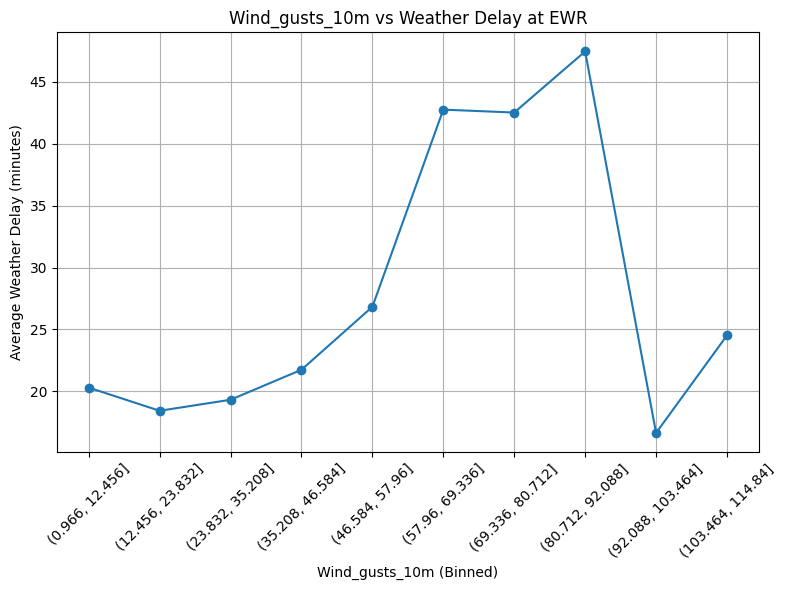

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\3391558497.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


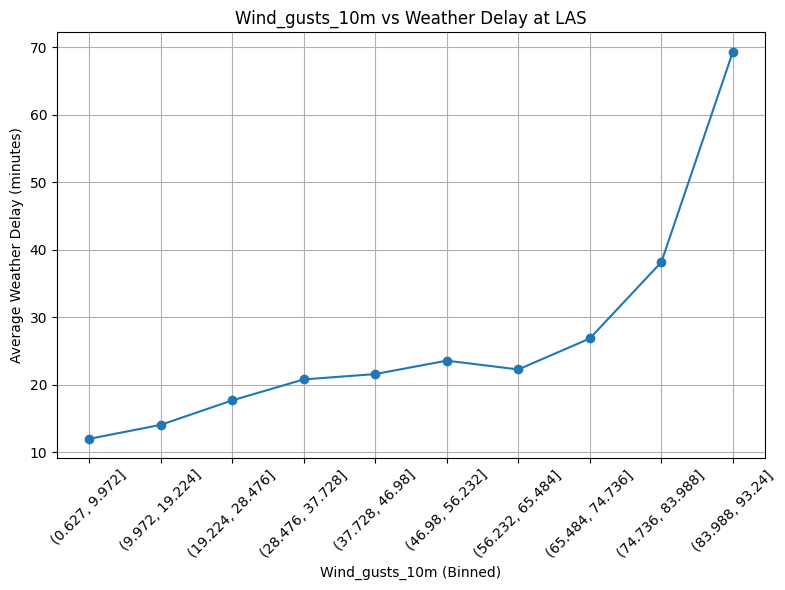

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\3391558497.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()


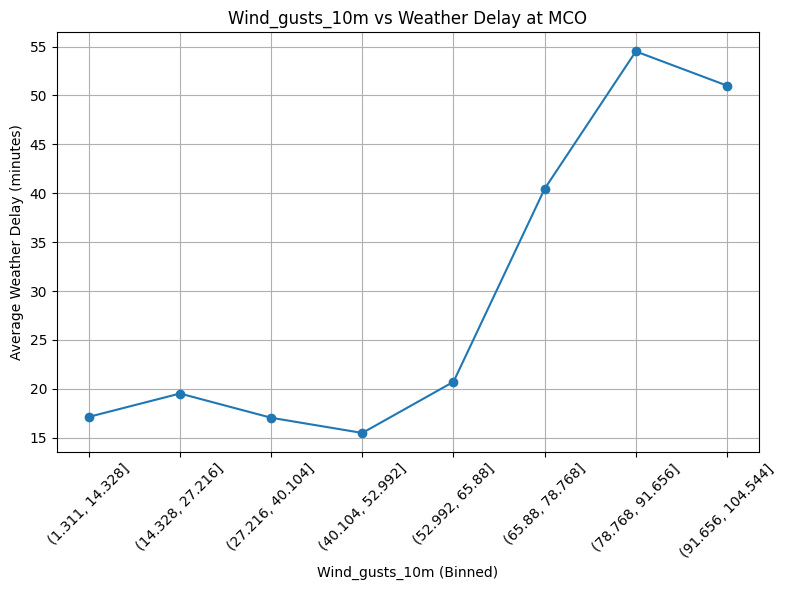

In [45]:
airports = ['EWR', 'LAS', 'MCO']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_gusts_10m']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['TOTAL_DELAY'].mean()
        
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

## Wanted to see which airpot gets the most snowfall and when , was not that helpful , Oh well

In [198]:
airports = ['JFK', 'EWR', 'ORD', 'PDX','SEA']

results = {}

for airport in airports:
    airport_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'] == airport]
    
    monthly_averages = airport_data.groupby('Month').agg({  
        'snowfall': 'mean'  
    }).reset_index()
    

    monthly_averages['Snowfall_Rank'] = monthly_averages['snowfall'].rank(ascending=False)
    
    results[airport] = monthly_averages

for airport, ranking in results.items():
    print(f"Ranking for {airport}:")
    print(ranking)
    print("\n")

Ranking for JFK:
    Month  snowfall  Snowfall_Rank
0       1  0.020022            3.0
1       2  0.026497            1.0
2       3  0.023315            2.0
3       4  0.001429            6.0
4       5  0.000019            7.0
5       6  0.000000           10.5
6       7  0.000000           10.5
7       8  0.000000           10.5
8       9  0.000000           10.5
9      10  0.000009            8.0
10     11  0.002751            5.0
11     12  0.008505            4.0


Ranking for EWR:
    Month  snowfall  Snowfall_Rank
0       1  0.019504            3.0
1       2  0.027961            1.0
2       3  0.024387            2.0
3       4  0.001769            6.0
4       5  0.000047            7.0
5       6  0.000000           10.0
6       7  0.000000           10.0
7       8  0.000000           10.0
8       9  0.000000           10.0
9      10  0.000000           10.0
10     11  0.004074            5.0
11     12  0.009239            4.0


Ranking for ORD:
    Month  snowfall  Snowfall_Rank


In [199]:
airports = ['JFK', 'EWR', 'ORD', 'SEA', 'PDX']

results = {}

for airport in airports:
    airport_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'] == airport]
    
    monthly_averages = airport_data.groupby('Month').agg({ 
        'snowfall': 'max'  
    }).reset_index()
    
   
    
    monthly_averages['Snowfall_Rank'] = monthly_averages['snowfall'].rank(ascending=False)
    
    results[airport] = monthly_averages

for airport, ranking in results.items():
    print(f"Ranking for {airport}:")
    print(ranking)
    print("\n")

Ranking for JFK:
    Month  snowfall  Snowfall_Rank
0       1      3.08            3.0
1       2      3.22            2.0
2       3      3.50            1.0
3       4      1.96            6.0
4       5      0.07            7.5
5       6      0.00           10.5
6       7      0.00           10.5
7       8      0.00           10.5
8       9      0.00           10.5
9      10      0.07            7.5
10     11      2.24            5.0
11     12      2.73            4.0


Ranking for EWR:
    Month  snowfall  Snowfall_Rank
0       1      2.45            3.5
1       2      3.36            2.0
2       3      4.41            1.0
3       4      2.17            5.0
4       5      0.14            7.0
5       6      0.00           10.0
6       7      0.00           10.0
7       8      0.00           10.0
8       9      0.00           10.0
9      10      0.00           10.0
10     11      2.45            3.5
11     12      1.96            6.0


Ranking for ORD:
    Month  snowfall  Snowfall_Rank


# CANCELLATIONS

## Different skeletion Code for Cancellations because , Cancellations dont have time data so it has to be daily weather conditions and not Hourly

In [20]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": [33.64, 35.21, 32.85, 39.86, 32.9, 40.69, 29.64, 40.64, 36.08, 33.94, 28.43, 25.79, 29.99, 41.97, 45.59, 33.43, 35.88, 47.45, 37.62, 37.36, 18.44, 38.7, 33.68, 38.75],
    "longitude": [-84.43, -80.95, -96.85, -104.67, -97.04, -74.17, -95.28, -73.78, -115.15, -118.41, -81.31, -80.29, -90.25, -87.91, -122.6, -112.01, -78.78, -122.31, -122.38, -121.94, -66, -121.59, -117.87, -90.37],
    "daily": ["weather_code","rain_sum", "snowfall_sum", "wind_speed_10m_max", "wind_gusts_10m_max"],
    "start_date": "2014-07-01",
    "end_date": "2024-06-30",
}
responses = openmeteo.weather_api(url, params=params)
dataset_airport_codes = [ x for x in dataset_airport_geo_codes['AIRPORT']]
airport_weather_dataframe_list = []
for row , airport_code in zip(range(len(responses)), dataset_airport_codes): 
# Process first location. Add a for-loop for multiple locations or weather models
    response = responses[row]
    print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

	# Process daily data. The order of variables needs to be the same as requested.
    daily = response.Daily()
    daily_weather_code = daily.Variables(0).ValuesAsNumpy()
    daily_rain_sum = daily.Variables(1).ValuesAsNumpy()
    daily_snowfall_sum = daily.Variables(2).ValuesAsNumpy()
    daily_wind_speed_10m_max = daily.Variables(3).ValuesAsNumpy()
    daily_wind_gusts_10m_max = daily.Variables(4).ValuesAsNumpy()

    daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
    daily_data['airport_code'] = airport_code
    daily_data["weather_code"] = daily_weather_code
    daily_data["rain_sum"] = daily_rain_sum
    daily_data["snowfall_sum"] = daily_snowfall_sum
    daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
    daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max

    daily_dataframe = pd.DataFrame(data = daily_data)
    airport_weather_dataframe_list.append(daily_dataframe)

Coordinates 33.63795852661133°N -84.4168701171875°E
Elevation 305.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 35.184532165527344°N -80.93112182617188°E
Elevation 213.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.86467361450195°N -96.82986450195312°E
Elevation 146.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 39.89455032348633°N -104.68618774414062°E
Elevation 1633.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.93497085571289°N -97.05880737304688°E
Elevation 178.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -74.19265747070312°E
Elevation 2.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 29.630929946899414°N -95.31866455078125°E
Elevation 12.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -73.81021118164062°E
Elevation 3.0 m asl
Timezone None None
Timezone difference t

In [21]:
# Getting the weather code as this will tell me what was so bad that day

airport_hist_weather_data_daily = pd.concat(airport_weather_dataframe_list, axis=0)
airport_hist_weather_data_daily = pd.merge(airport_hist_weather_data_daily, weather_codes, how="left", on='weather_code')
airport_hist_weather_data_daily['date'] = airport_hist_weather_data_daily['date'].dt.tz_localize(None)

In [22]:
airport_hist_weather_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      87672 non-null  datetime64[ns]
 1   airport_code              87672 non-null  object        
 2   weather_code              87672 non-null  float32       
 3   rain_sum                  87672 non-null  float32       
 4   snowfall_sum              87672 non-null  float32       
 5   wind_speed_10m_max        87672 non-null  float32       
 6   wind_gusts_10m_max        87672 non-null  float32       
 7   Weather Code Description  87672 non-null  object        
dtypes: datetime64[ns](1), float32(5), object(2)
memory usage: 3.7+ MB


In [23]:
# I only want these rows 
us_avaiation_data_cancelled = us_avaiation_data[['FL_DATE','ORIGIN', 'DEST','CANCELLED']]

weather_cancelled = us_avaiation_data_cancelled

## Grouping By DEST and ORIGIN and aggregating to get the CANCELLATION RATIO = CANCELED FLIGHTS / TOTAL FLIGHTS

In [24]:
arr_cancel_sum = weather_cancelled.groupby(by = ['FL_DATE','DEST']).agg(
    canceled_flights_arr=('CANCELLED', lambda x: (x == 1.0).sum()),
     non_canceled_flights_arr=('CANCELLED', lambda x: (x == 0.0).sum())
    ).reset_index()
arr_cancel_sum['total_flights_arr'] = arr_cancel_sum['non_canceled_flights_arr'] + arr_cancel_sum['canceled_flights_arr']
arr_cancel_sum['cancelation_ratio_arr'] = arr_cancel_sum['canceled_flights_arr'] / arr_cancel_sum['total_flights_arr']



dep_cancel_sum = weather_cancelled.groupby(by =['FL_DATE','ORIGIN']).agg(
     canceled_flights_dep=('CANCELLED', lambda x: (x == 1.0).sum()),
     non_canceled_flights_dep=('CANCELLED', lambda x: (x == 0.0).sum())
).reset_index()

dep_cancel_sum['total_flights_dep'] = dep_cancel_sum['non_canceled_flights_dep'] + dep_cancel_sum['canceled_flights_dep']
arr_cancel_sum['cancelation_ratio_dep'] = dep_cancel_sum['canceled_flights_dep'] / dep_cancel_sum['total_flights_dep']


weather_cancelled = pd.merge(arr_cancel_sum, dep_cancel_sum, left_on=['FL_DATE', 'DEST'] , right_on=['FL_DATE','ORIGIN'], how='outer')
weather_cancelled['total_canceled_flights'] = weather_cancelled['canceled_flights_arr'].fillna(0) + weather_cancelled['canceled_flights_dep'].fillna(0)
weather_cancelled['total_non_canceled_flights'] = weather_cancelled['non_canceled_flights_arr'].fillna(0) + weather_cancelled['non_canceled_flights_dep'].fillna(0)
weather_cancelled['total_flights'] = weather_cancelled['total_flights_arr'].fillna(0) + weather_cancelled['total_flights_dep'].fillna(0)
weather_cancelled['total_cancelation_ratio'] = weather_cancelled['total_canceled_flights'].fillna(0) / weather_cancelled['total_flights'].fillna(0)


weather_cancelled.drop(columns=['ORIGIN', 'canceled_flights_arr', 'non_canceled_flights_arr', 'total_flights_arr', 'canceled_flights_dep',
       'non_canceled_flights_dep', 'total_flights_dep'], inplace=True)
weather_cancelled.rename(columns={'DEST': 'airport_code', 'FL_DATE': 'date'}, inplace=True)


In [25]:
weather_cancelled

date airport_code  cancelation_ratio_arr  cancelation_ratio_dep  \
0     2014-07-01          ATL               0.000000               0.000000   
1     2014-07-01          CLT               0.006993               0.000000   
2     2014-07-01          DAL               0.043478               0.065217   
3     2014-07-01          DEN               0.004717               0.004673   
4     2014-07-01          DFW               0.000000               0.000000   
...          ...          ...                    ...                    ...   
87667 2024-06-30          SJC               0.000000               0.000000   
87668 2024-06-30          SJU               0.044118               0.014493   
87669 2024-06-30          SMF               0.010638               0.010638   
87670 2024-06-30          SNA               0.000000               0.021053   
87671 2024-06-30          STL               0.021739               0.010753   

       total_canceled_flights  total_non_canceled_flights  total_flights  \
0                           0                         517            517   
1                           1                         283            284   
2                           5                          87             92   
3                           2                         424            426   
4                           0                         470            470   
...                       ...                         ...            ...   
87667                       0                         173            173   
87668                       4                         133            137   
87669                       2                         186            188   
87670                       2                         190            192   
87671                       3                         182            185   

       total_cancelation_ratio  
0                     0.000000  
1                     0.003521  
2                     0.054348  
3                     0.004695  
4                     0.000000  
...                        ...  
87667                 0.000000  
87668                 0.029197  
87669                 0.010638  
87670                 0.010417  
87671                 0.016216  

[87672 rows x 8 columns]

In [26]:
# merging flight data with weather data and formatting date

airport_hist_weather_daily_data_cancelled = pd.merge(left=airport_hist_weather_data_daily, right=weather_cancelled, how='inner', on = ['date', 'airport_code'])

airport_hist_weather_daily_data_cancelled['Year'] = airport_hist_weather_daily_data_cancelled['date'].dt.year
airport_hist_weather_daily_data_cancelled['Month'] = airport_hist_weather_daily_data_cancelled['date'].dt.month
airport_hist_weather_daily_data_cancelled['Day'] = airport_hist_weather_daily_data_cancelled['date'].dt.day

# rearranging columns
airport_hist_weather_daily_data_cancelled = airport_hist_weather_daily_data_cancelled[['Month', 'Day','weather_code', 'rain_sum', 'snowfall_sum',
       'wind_speed_10m_max', 'wind_gusts_10m_max','total_cancelation_ratio']]

In [31]:
airport_hist_weather_daily_data_cancelled

Month  Day airport_code  weather_code   rain_sum  snowfall_sum  \
0          7    1          ATL           3.0   0.000000           0.0   
1          7    2          ATL          53.0   0.500000           0.0   
2          7    3          ATL          53.0   0.500000           0.0   
3          7    4          ATL           3.0   0.000000           0.0   
4          7    5          ATL           2.0   0.000000           0.0   
...      ...  ...          ...           ...        ...           ...   
87667      6   26          STL          63.0  28.400000           0.0   
87668      6   27          STL           0.0   0.000000           0.0   
87669      6   28          STL           3.0   0.000000           0.0   
87670      6   29          STL          63.0  24.300001           0.0   
87671      6   30          STL          53.0   2.600000           0.0   

       wind_speed_10m_max  wind_gusts_10m_max  total_cancelation_ratio  
0                8.217153           24.480000                 0.000000  
1                9.107359           25.199999                 0.013133  
2               20.421871           44.279999                 0.034991  
3               16.179987           40.680000                 0.002525  
4               18.003599           38.880001                 0.002309  
...                   ...                 ...                      ...  
87667           18.003599           39.239998                 0.000000  
87668            9.693295           31.319998                 0.000000  
87669           20.721119           39.599998                 0.000000  
87670           25.364037           53.279999                 0.000000  
87671           15.745627           33.839996                 0.016216  

[87672 rows x 9 columns]

In [32]:
save_dest = r"C:\Users\youss\Documents\University of Calgary\DATA 601"
save_variable = os.path.join(save_dest, 'cancelation_ratio_dataset.csv')
# airport_hist_weather_daily_data_cancelled.to_csv(save_variable)

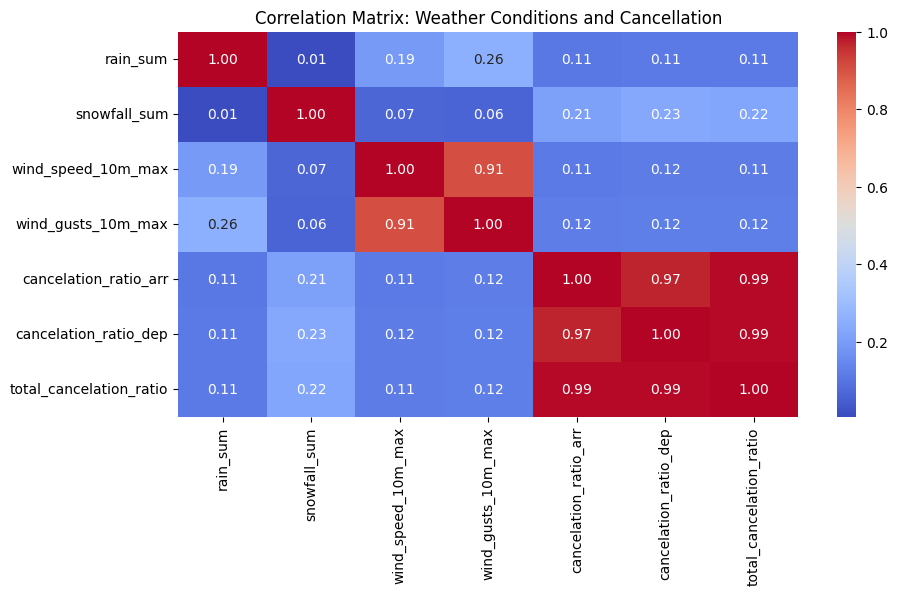

In [306]:
cols_for_corr = ['rain_sum', 'snowfall_sum', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'cancelation_ratio_arr', 'cancelation_ratio_dep', 'total_cancelation_ratio']
airport_cancelled_corr = airport_hist_weather_daily_data_cancelled[cols_for_corr].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(airport_cancelled_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Weather Conditions and Cancellation')
plt.show()

In [263]:
airport_cancelled_corr

rain_sum  snowfall_sum  wind_speed_10m_max  \
rain_sum                 1.000000      0.005932            0.194295   
snowfall_sum             0.005932      1.000000            0.066364   
wind_speed_10m_max       0.194295      0.066364            1.000000   
wind_gusts_10m_max       0.256995      0.060876            0.907091   
cancelation_ratio_arr    0.108564      0.210727            0.113006   
cancelation_ratio_dep    0.111349      0.234667            0.115158   
total_cancelation_ratio  0.110789      0.224428            0.114945   

                         wind_gusts_10m_max  cancelation_ratio_arr  \
rain_sum                           0.256995               0.108564   
snowfall_sum                       0.060876               0.210727   
wind_speed_10m_max                 0.907091               0.113006   
wind_gusts_10m_max                 1.000000               0.120034   
cancelation_ratio_arr              0.120034               1.000000   
cancelation_ratio_dep              0.123608               0.970394   
total_cancelation_ratio            0.122749               0.992508   

                         cancelation_ratio_dep  total_cancelation_ratio  
rain_sum                              0.111349                 0.110789  
snowfall_sum                          0.234667                 0.224428  
wind_speed_10m_max                    0.115158                 0.114945  
wind_gusts_10m_max                    0.123608                 0.122749  
cancelation_ratio_arr                 0.970394                 0.992508  
cancelation_ratio_dep                 1.000000                 0.992632  
total_cancelation_ratio               0.992632                 1.000000

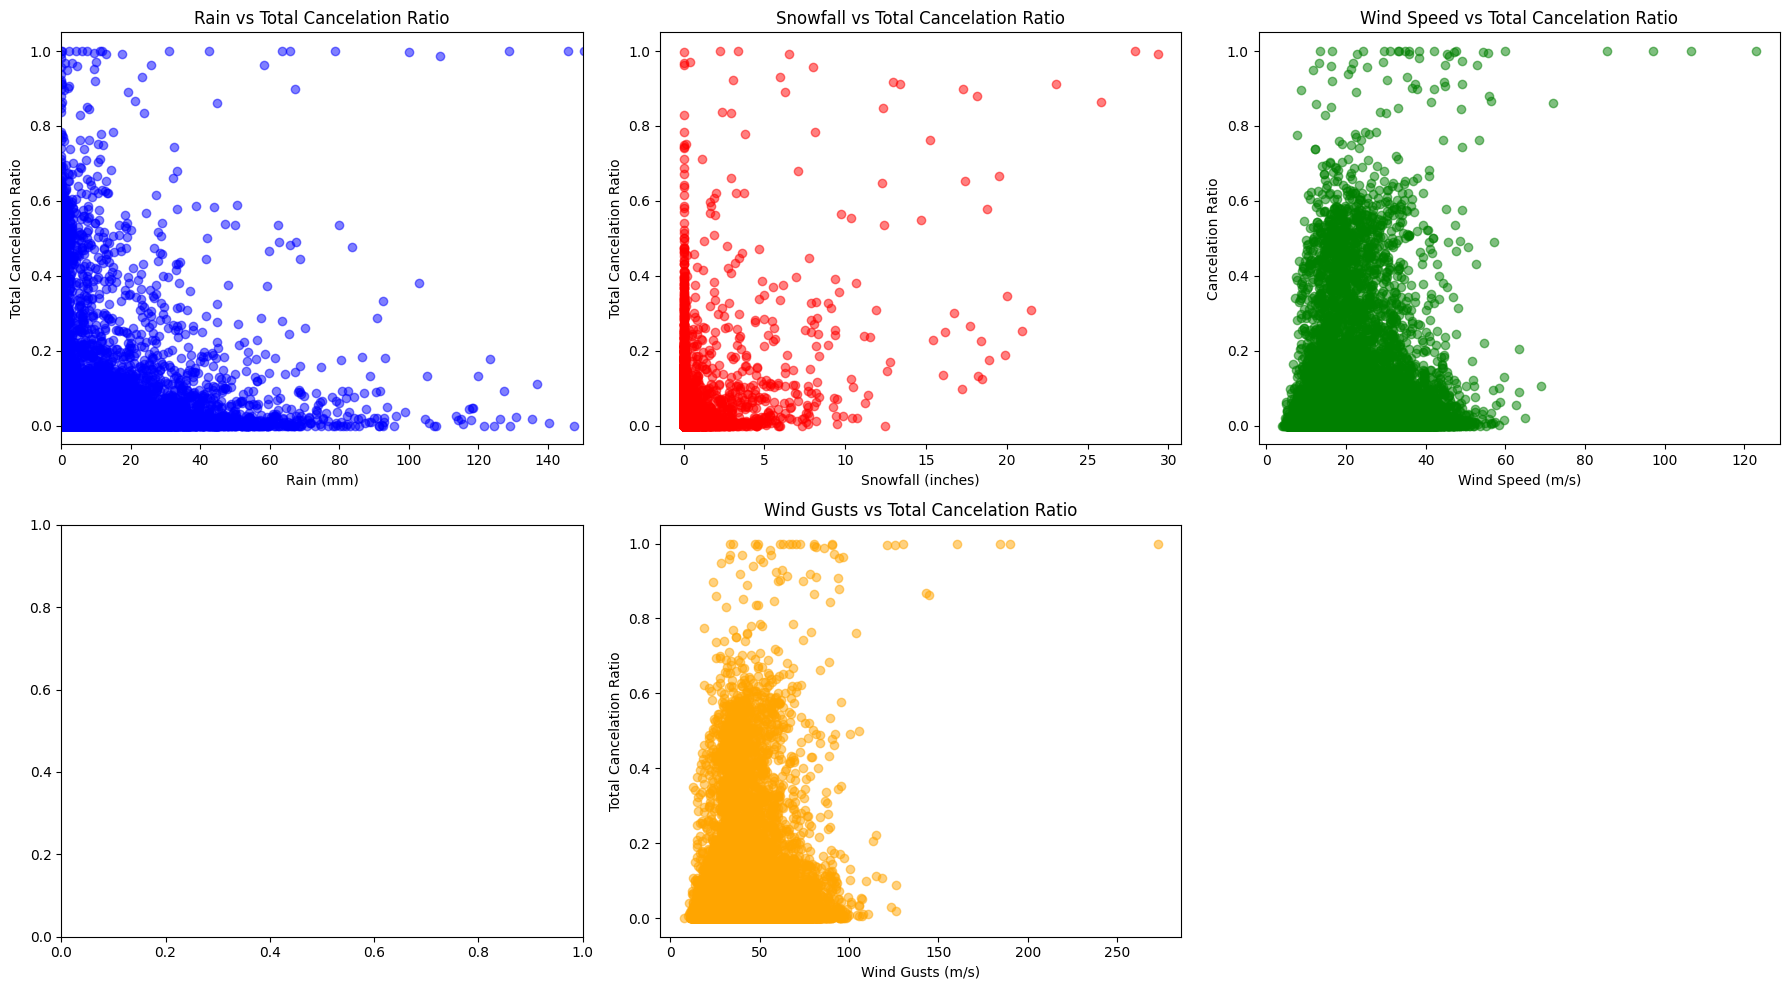

In [318]:
import matplotlib.pyplot as plt
winter_months = [10,11,12,1,2]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].scatter(airport_hist_weather_daily_data_cancelled['rain_sum'], airport_hist_weather_daily_data_cancelled['total_cancelation_ratio'], color='blue', alpha=0.5)
axes[0, 0].set_title('Rain vs Total Cancelation Ratio')
axes[0, 0].set_xlabel('Rain (mm)')
axes[0, 0].set_ylabel('Total Cancelation Ratio')
axes[0, 0].set_xlim(0, 100)

axes[0, 1].scatter(airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['Month'].isin(winter_months)]['snowfall_sum'], airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['Month'].isin(winter_months)]['total_cancelation_ratio'], color='red', alpha=0.5)
axes[0, 1].set_title('Snowfall vs Total Cancelation Ratio')
axes[0, 1].set_xlabel('Snowfall (inches)')
axes[0, 1].set_ylabel('Total Cancelation Ratio')

axes[0, 2].scatter(airport_hist_weather_daily_data_cancelled['wind_speed_10m_max'], airport_hist_weather_daily_data_cancelled['total_cancelation_ratio'], color='green', alpha=0.5)
axes[0, 2].set_title('Wind Speed vs Total Cancelation Ratio')
axes[0, 2].set_xlabel('Wind Speed (m/s)')
axes[0, 2].set_ylabel('Cancelation Ratio')
axes[0, 0].set_xlim(0, 85)



axes[1, 1].scatter(airport_hist_weather_daily_data_cancelled['wind_gusts_10m_max'], airport_hist_weather_daily_data_cancelled['total_cancelation_ratio'], color='orange', alpha=0.5)
axes[1, 1].set_title('Wind Gusts vs Total Cancelation Ratio')
axes[1, 1].set_xlabel('Wind Gusts (m/s)')
axes[1, 1].set_ylabel('Total Cancelation Ratio')
axes[0, 0].set_xlim(0, 150)


fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


C:\Users\youss\AppData\Local\Temp\ipykernel_24372\410197625.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins])['total_cancelation_ratio'].mean().unstack()


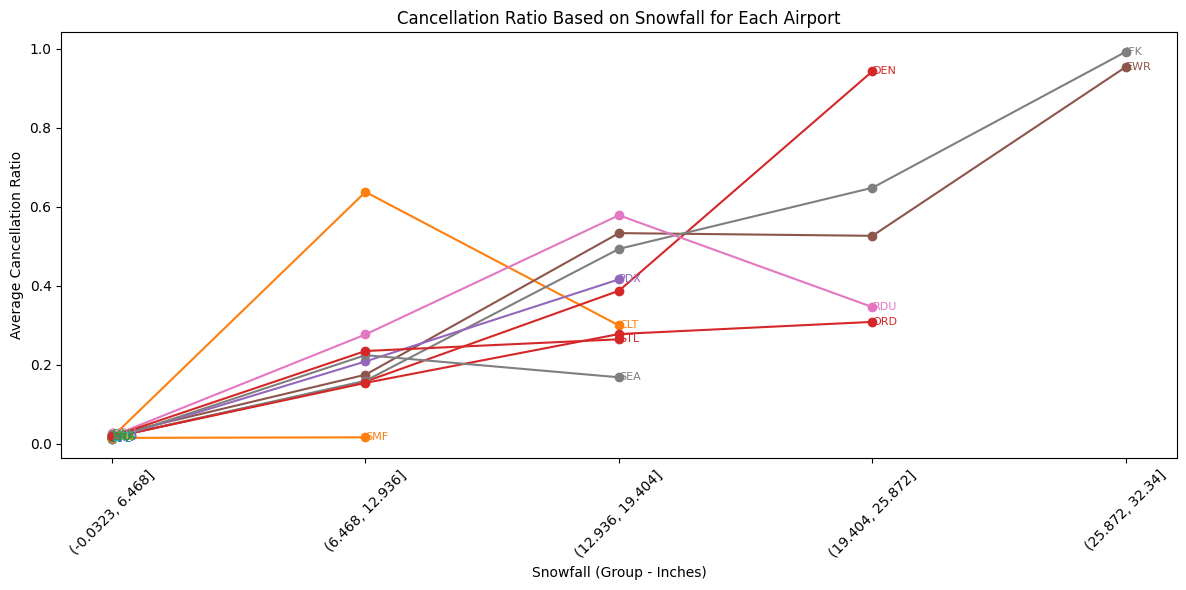

In [308]:


cancel_bins = pd.cut(airport_hist_weather_daily_data_cancelled['snowfall_sum'], bins=5)

grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins])['total_cancelation_ratio'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Cancellation Ratio Based on Snowfall for Each Airport')
plt.xlabel('Snowfall (Group - Inches)')
plt.ylabel('Average Cancellation Ratio')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2081834017.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['total_cancelation_ratio'].mean()


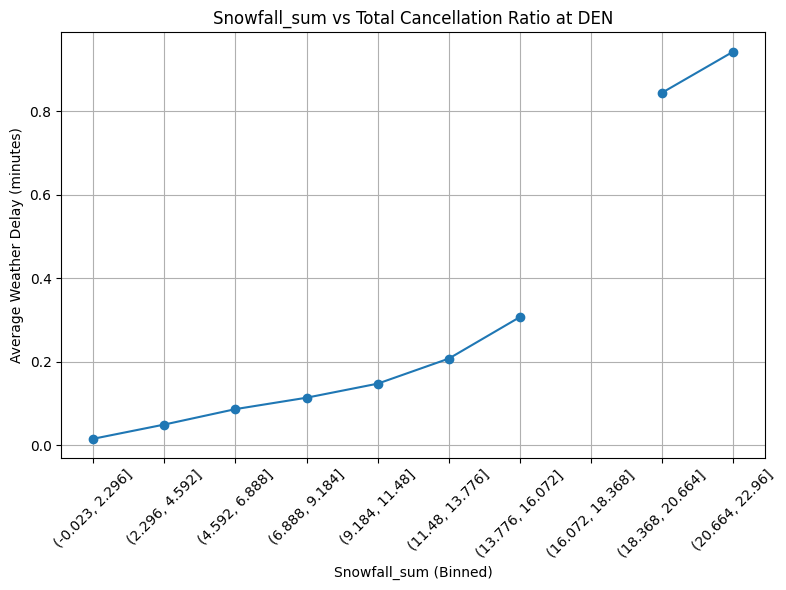

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2081834017.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['total_cancelation_ratio'].mean()


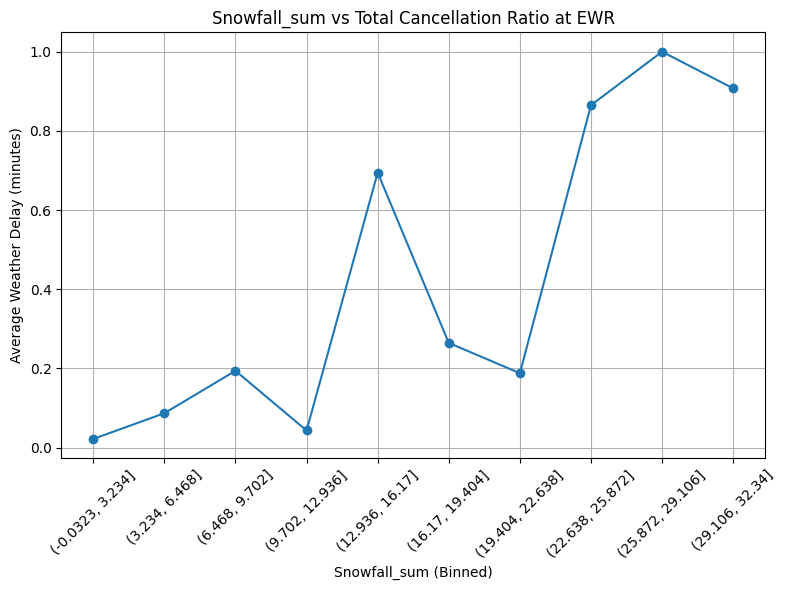

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2081834017.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['total_cancelation_ratio'].mean()


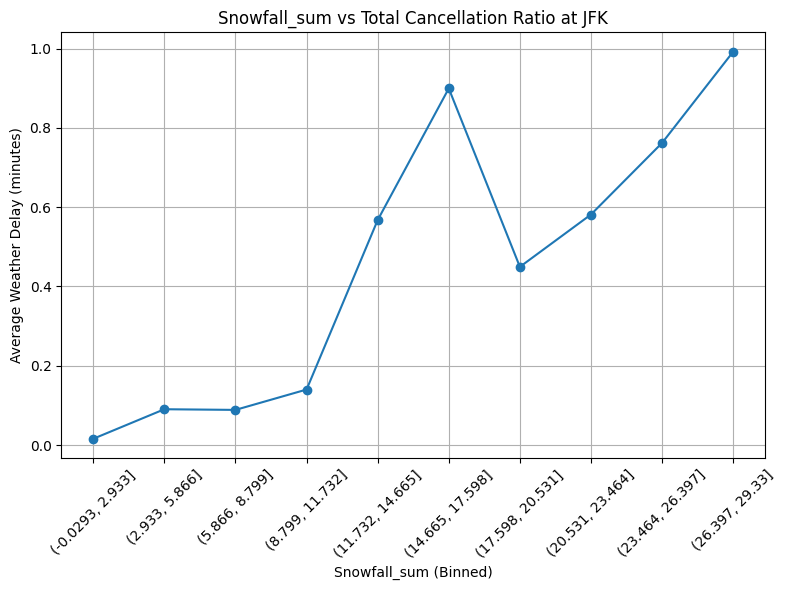

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2081834017.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['total_cancelation_ratio'].mean()


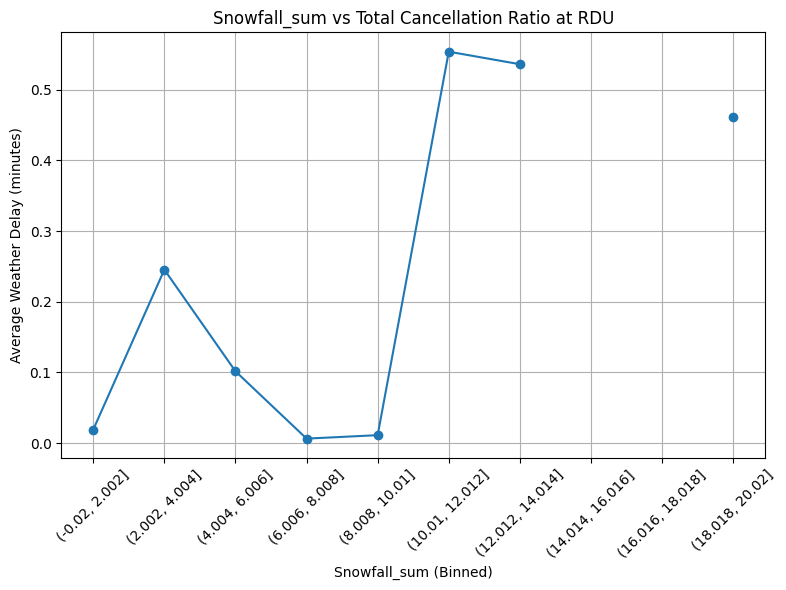

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\2081834017.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['total_cancelation_ratio'].mean()


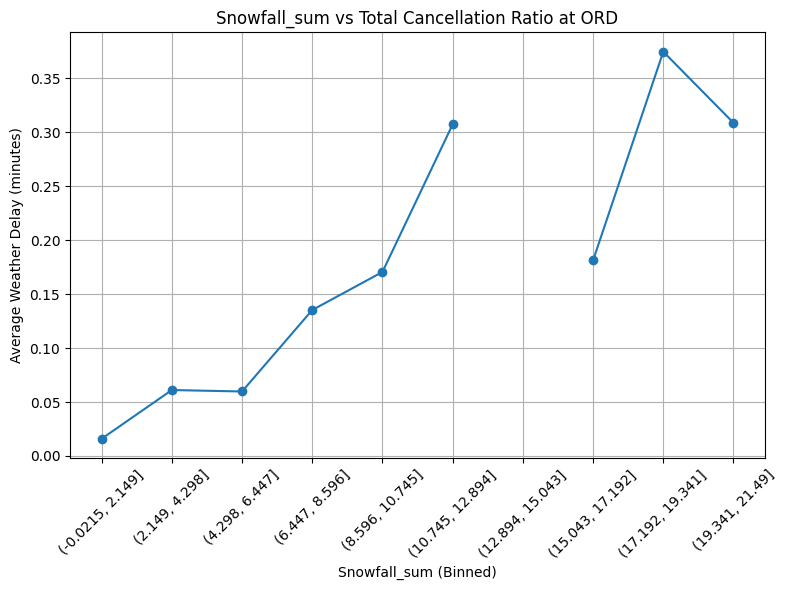

In [271]:
airports = ['DEN', 'EWR', 'JFK', 'RDU', 'ORD']
filtered_data = airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['airport_code'].isin(airports)]

weather_factors = ['snowfall_sum']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['total_cancelation_ratio'].mean()
        
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Total Cancellation Ratio at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

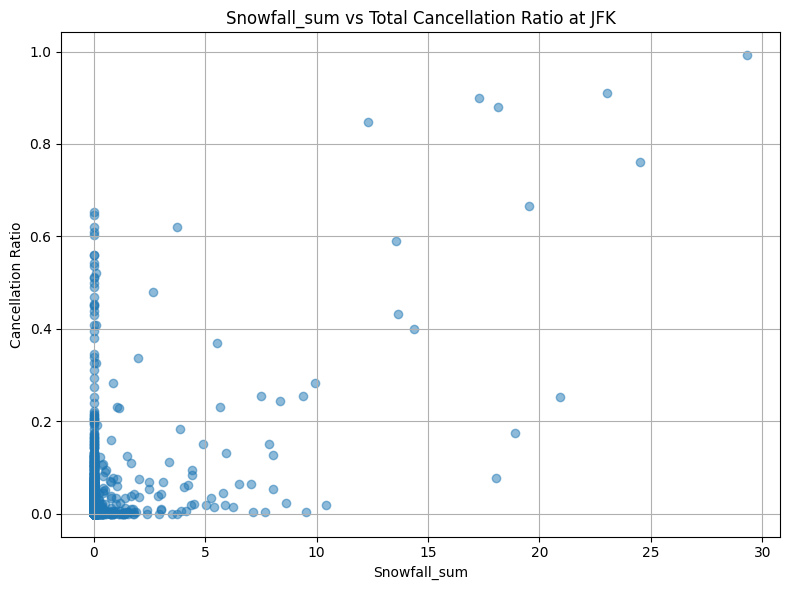

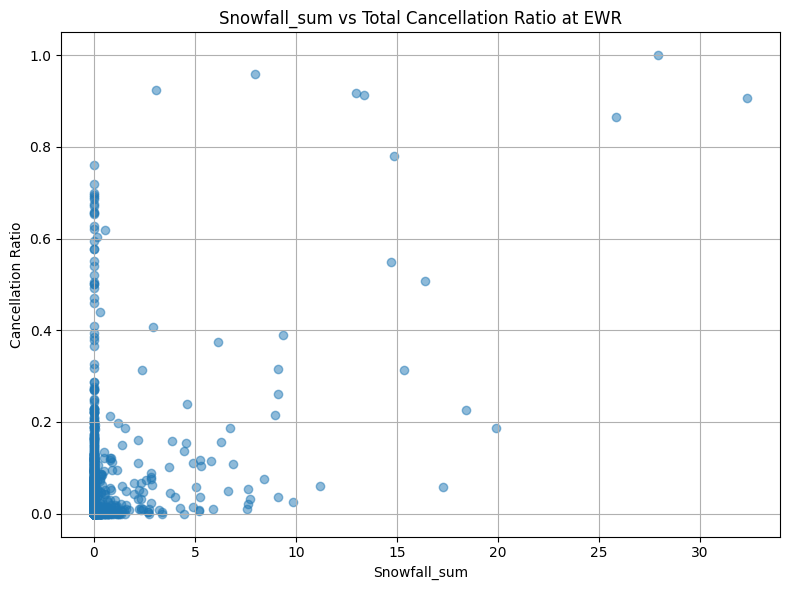

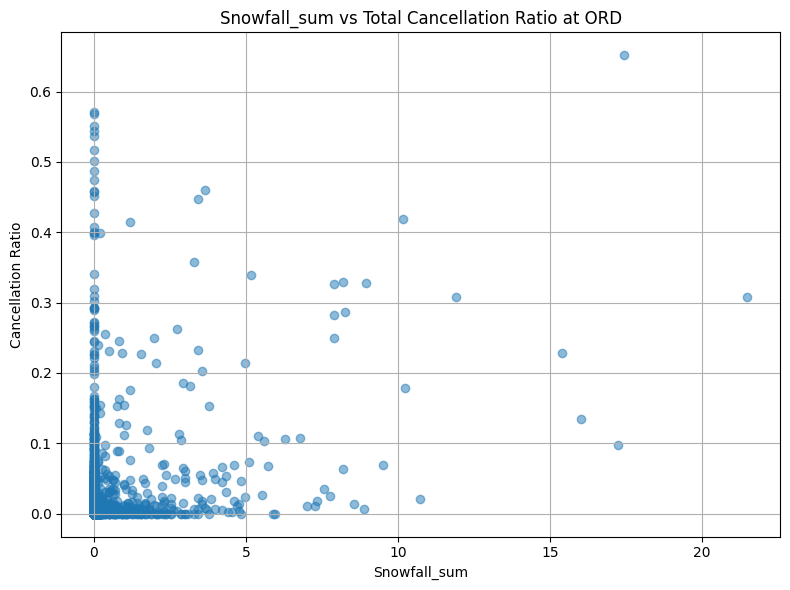

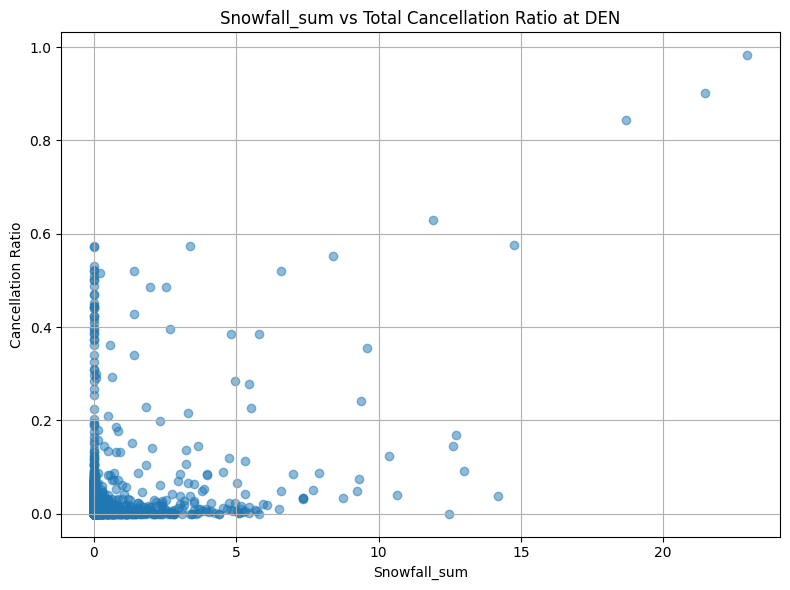

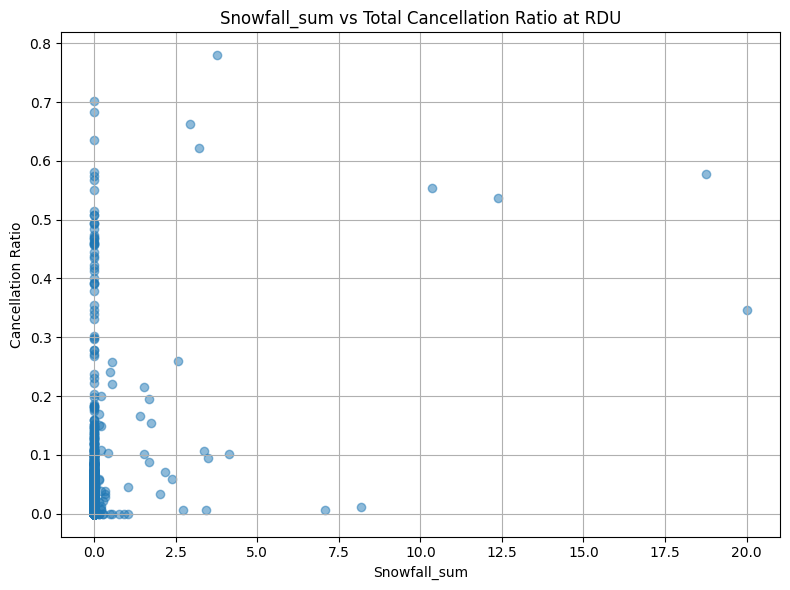

In [272]:
airports = ['JFK', 'EWR', 'ORD','DEN', 'RDU']
filtered_data = airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['airport_code'].isin(airports)]

weather_factors = ['snowfall_sum']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['total_cancelation_ratio'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Total Cancellation Ratio at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Cancellation Ratio')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\3528284890.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_gust])['cancelation_ratio_arr'].mean().unstack()


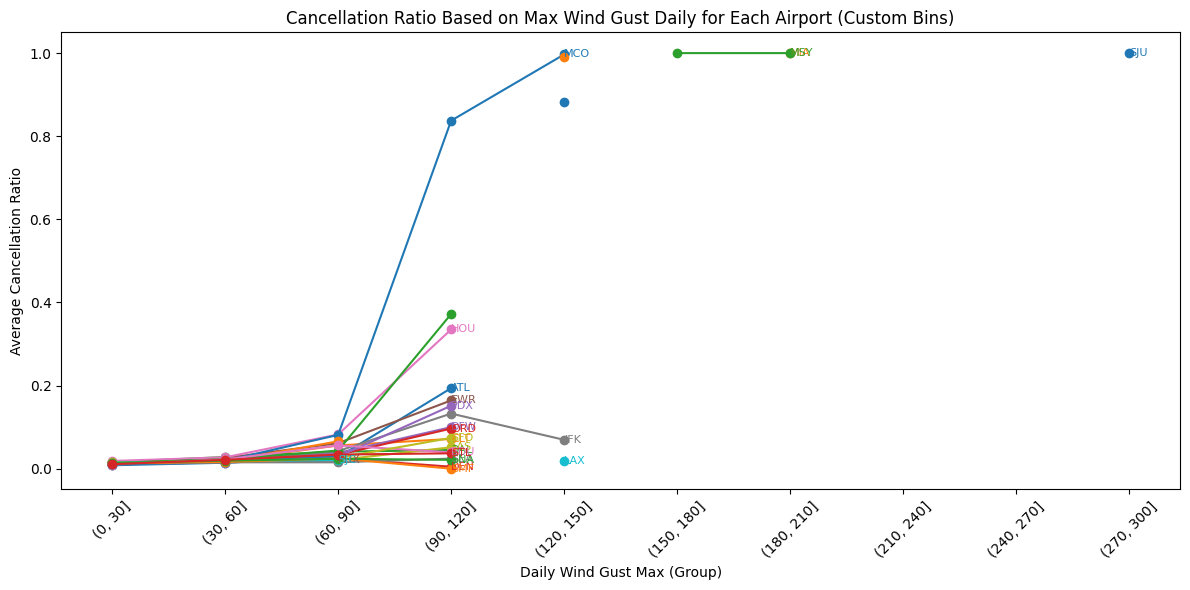

In [276]:
custom_bins_gust = [0, 30, 60, 90, 120, 150, 180, 210,240,270,300] 


cancel_bins_gust = pd.cut(airport_hist_weather_daily_data_cancelled['wind_gusts_10m_max'], bins=custom_bins_gust)

grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_gust])['cancelation_ratio_arr'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Cancellation Ratio Based on Max Wind Gust Daily for Each Airport (Custom Bins)')
plt.xlabel('Daily Wind Gust Max (Group)')
plt.ylabel('Average Cancellation Ratio')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\898835844.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_wind])['cancelation_ratio_dep'].mean().unstack()


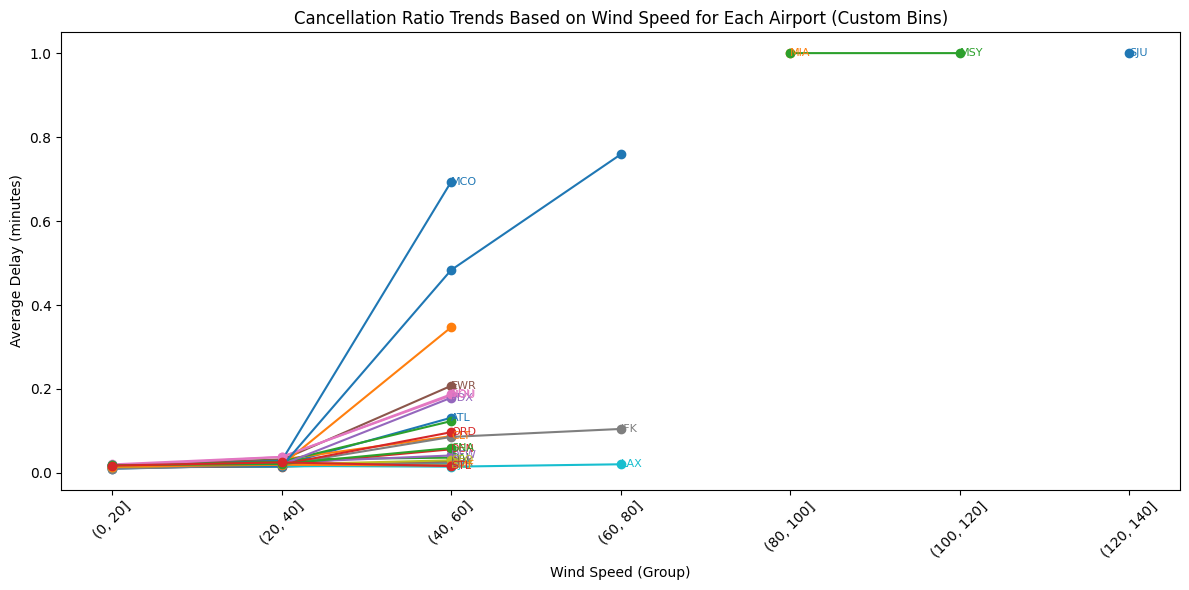

In [278]:
custom_bins_wind = [0, 20, 40, 60, 80, 100, 120, 140]  
cancel_bins_wind = pd.cut(airport_hist_weather_daily_data_cancelled['wind_speed_10m_max'], bins=custom_bins_wind)

grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_wind])['cancelation_ratio_dep'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Cancellation Ratio Trends Based on Wind Speed for Each Airport (Custom Bins)')
plt.xlabel('Wind Speed (Group)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)


plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_24372\3295475754.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Airport'] = airport


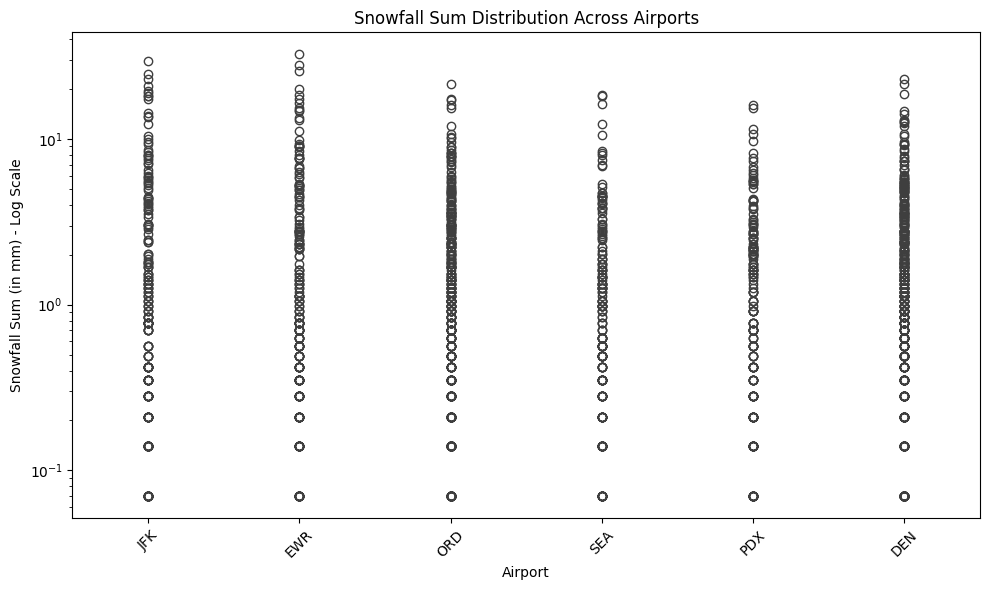

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

airports = ['JFK', 'EWR', 'ORD', 'SEA', 'PDX', 'DEN']
results = {}

for airport in airports:
    airport_data = airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['airport_code'] == airport]
    results[airport] = airport_data[['Month', 'snowfall_sum']]

plt.figure(figsize=(10, 6))

combined_data = []

for airport, data in results.items():
    data['Airport'] = airport
    combined_data.append(data)

combined_df = pd.concat(combined_data)

sns.boxplot(x='Airport', y='snowfall_sum', data=combined_df)
plt.yscale('log')
plt.title('Snowfall Sum Distribution Across Airports')
plt.ylabel('Snowfall Sum (in mm) - Log Scale')
plt.xlabel('Airport')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [47]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [39]:
# assigning X and Y variables 
X = airport_hist_weather_daily_data_cancelled.drop(columns=['total_cancelation_ratio'])
y = airport_hist_weather_daily_data_cancelled['total_cancelation_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Using Polynomial features to get the second moment, We know the relationship is not linear 

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [43]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train_poly, y_train)

Ridge()

In [44]:
y_pred_ridge = ridge_model.predict(X_test_poly)


In [45]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r_squared_ridge = ridge_model.score(X_test_poly, y_test)
print(f'Ridge MSE: {mse_ridge}')
print(f'Ridge R-Squared: {r_squared_ridge}')


Ridge MSE: 0.003492344120309727
Ridge R-Squared: 0.04941913369656237


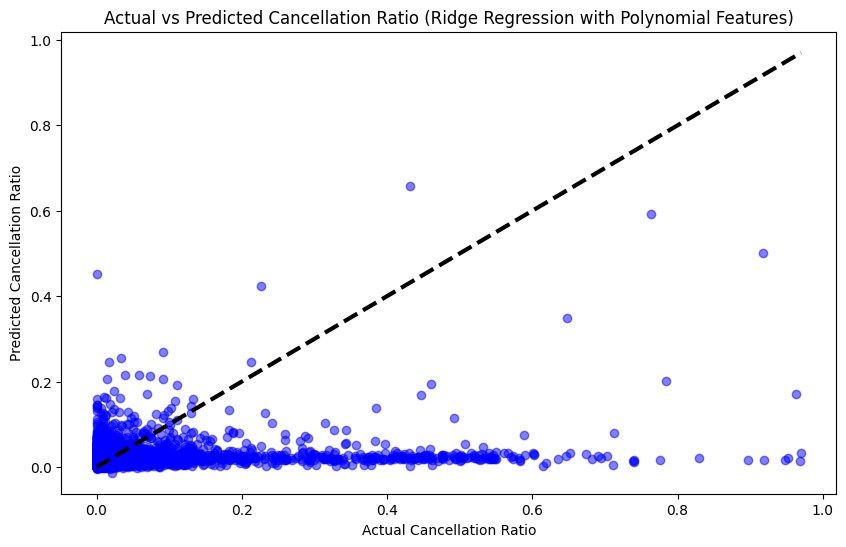

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Ideal line
plt.xlabel('Actual Cancellation Ratio')
plt.ylabel('Predicted Cancellation Ratio')
plt.title('Actual vs Predicted Cancellation Ratio (Ridge Regression with Polynomial Features)')
plt.show()

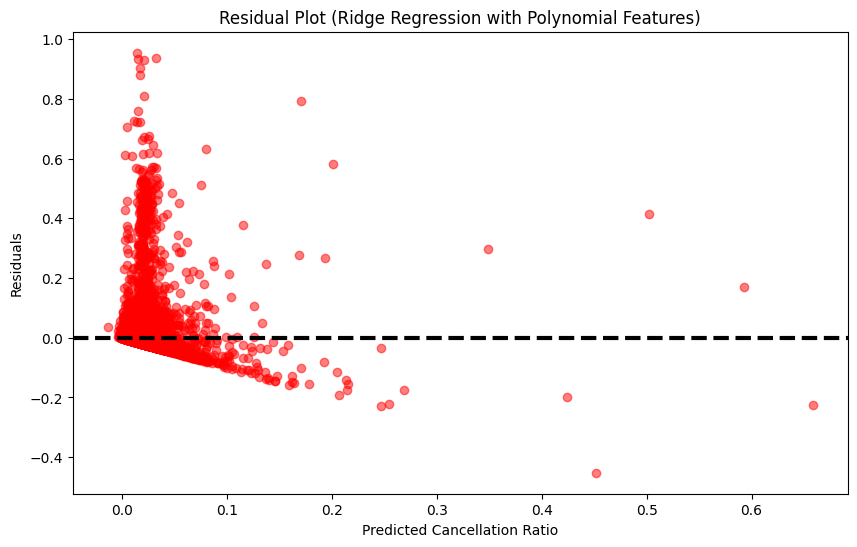

In [49]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals, alpha=0.5, color='r')
plt.axhline(y=0, color='k', linestyle='--', lw=3)
plt.xlabel('Predicted Cancellation Ratio')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression with Polynomial Features)')
plt.show()

In [50]:
coefficients_ridge = ridge_model.coef_
poly_feature_names = poly.get_feature_names_out(X.columns)
ridge_coefficients_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coefficients_ridge
})
ridge_coefficients_df_sorted = ridge_coefficients_df.reindex(
    ridge_coefficients_df.Coefficient.abs().sort_values(ascending=False).index
)
ridge_coefficients_df_sorted.head()


Feature  Coefficient
4                snowfall_sum     0.025039
3                    rain_sum    -0.017247
21      weather_code rain_sum     0.014123
22  weather_code snowfall_sum    -0.009677
2                weather_code     0.006926

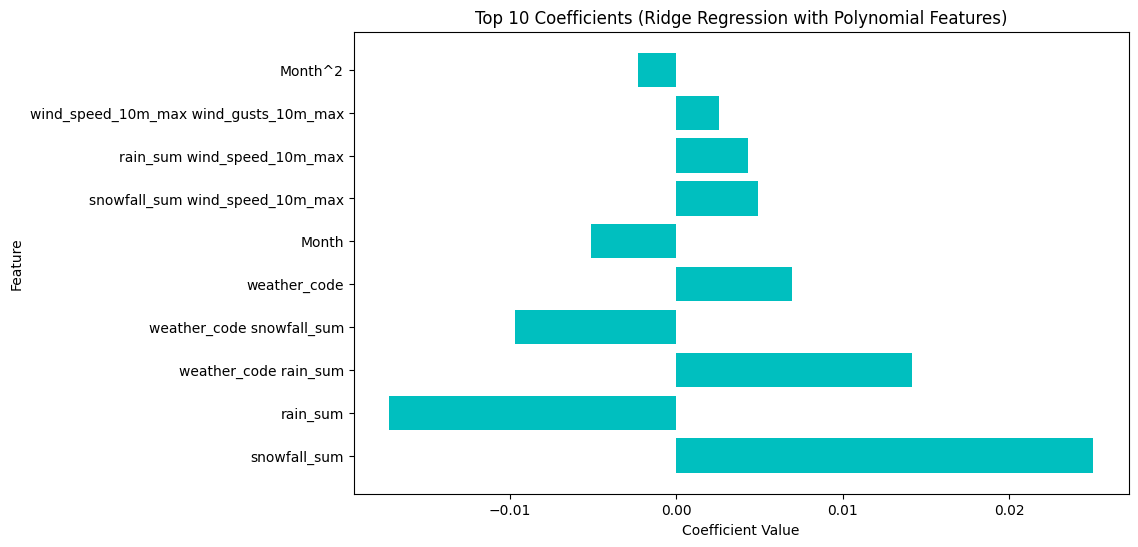

In [51]:
top_coefficients = ridge_coefficients_df_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_coefficients['Feature'], top_coefficients['Coefficient'], color='c')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Coefficients (Ridge Regression with Polynomial Features)')
plt.show()